In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
os.getcwd()

'C:\\Users\\User'

In [5]:
os.chdir('C:\\Users\\User\\Downloads\\csv_modified\\csv_modified\\2')

In [6]:
TSR20_3D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_3D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_3D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_3D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_3D_probe5 = pd.read_csv('probe5.csv', header=None)

In [7]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2D\\probe_2D\\TSR2.0')

In [8]:
TSR20_2D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2D_probe5 = pd.read_csv('probe5.csv', header=None)

In [9]:
os.chdir('C:\\Users\\User\\Downloads\\probe_2.5D\\probe_2.5D\\TSR2')

In [10]:
TSR20_2_5D_probe1 = pd.read_csv('probe1.csv', header=None)
TSR20_2_5D_probe2 = pd.read_csv('probe2.csv', header=None)
TSR20_2_5D_probe3 = pd.read_csv('probe3.csv', header=None)
TSR20_2_5D_probe4 = pd.read_csv('probe4.csv', header=None)
TSR20_2_5D_probe5 = pd.read_csv('probe5.csv', header=None)

In [11]:
os.chdir('C:\\Users\\User')

In [12]:
TSR20_2D_probe1 = TSR20_2D_probe1.to_numpy(dtype='float32')
TSR20_2D_probe2 = TSR20_2D_probe2.to_numpy(dtype='float32')
TSR20_2D_probe3 = TSR20_2D_probe3.to_numpy(dtype='float32')
TSR20_2D_probe4 = TSR20_2D_probe4.to_numpy(dtype='float32')
TSR20_2D_probe5 = TSR20_2D_probe5.to_numpy(dtype='float32')

In [13]:
TSR20_2_5D_probe1 = TSR20_2_5D_probe1.to_numpy(dtype='float32')
TSR20_2_5D_probe2 = TSR20_2_5D_probe2.to_numpy(dtype='float32')
TSR20_2_5D_probe3 = TSR20_2_5D_probe3.to_numpy(dtype='float32')
TSR20_2_5D_probe4 = TSR20_2_5D_probe4.to_numpy(dtype='float32')
TSR20_2_5D_probe5 = TSR20_2_5D_probe5.to_numpy(dtype='float32')

In [14]:
TSR20_3D_probe1 = TSR20_3D_probe1.to_numpy(dtype='float32')
TSR20_3D_probe2 = TSR20_3D_probe2.to_numpy(dtype='float32')
TSR20_3D_probe3 = TSR20_3D_probe3.to_numpy(dtype='float32')
TSR20_3D_probe4 = TSR20_3D_probe4.to_numpy(dtype='float32')
TSR20_3D_probe5 = TSR20_3D_probe5.to_numpy(dtype='float32')

In [15]:
x20_2D_probe1 = TSR20_2D_probe1[:36, 4]
x20_2D_probe2 = TSR20_2D_probe2[:36, 4]
x20_2D_probe3 = TSR20_2D_probe3[:36, 4]
x20_2D_probe4 = TSR20_2D_probe4[:36, 4]
x20_2D_probe5 = TSR20_2D_probe5[:36, 4]

In [16]:
x20_2_5D_probe1 = TSR20_2_5D_probe1[:36, 4]
x20_2_5D_probe2 = TSR20_2_5D_probe2[:36, 4]
x20_2_5D_probe3 = TSR20_2_5D_probe3[:36, 4]
x20_2_5D_probe4 = TSR20_2_5D_probe4[:36, 4]
x20_2_5D_probe5 = TSR20_2_5D_probe5[:36, 4]

In [17]:
x20_3D_probe1 = TSR20_3D_probe1[:36, 4]
x20_3D_probe2 = TSR20_3D_probe2[:36, 4]
x20_3D_probe3 = TSR20_3D_probe3[:36, 4]
x20_3D_probe4 = TSR20_3D_probe4[:36, 4]
x20_3D_probe5 = TSR20_3D_probe5[:36, 4]

In [18]:
x20_2D_probe1 = x20_2D_probe1.reshape((36, 1))
x20_2D_probe2 = x20_2D_probe2.reshape((36, 1))
x20_2D_probe3 = x20_2D_probe3.reshape((36, 1))
x20_2D_probe4 = x20_2D_probe4.reshape((36, 1))
x20_2D_probe5 = x20_2D_probe5.reshape((36, 1))

In [19]:
x20_2_5D_probe1 = x20_2_5D_probe1.reshape((36, 1))
x20_2_5D_probe2 = x20_2_5D_probe2.reshape((36, 1))
x20_2_5D_probe3 = x20_2_5D_probe3.reshape((36, 1))
x20_2_5D_probe4 = x20_2_5D_probe4.reshape((36, 1))
x20_2_5D_probe5 = x20_2_5D_probe5.reshape((36, 1))

In [20]:
x20_3D_probe1 = x20_3D_probe1.reshape((36, 1))
x20_3D_probe2 = x20_3D_probe2.reshape((36, 1))
x20_3D_probe3 = x20_3D_probe3.reshape((36, 1))
x20_3D_probe4 = x20_3D_probe4.reshape((36, 1))
x20_3D_probe5 = x20_3D_probe5.reshape((36, 1))

In [21]:
print(x20_3D_probe5.shape)

(36, 1)


In [22]:
x_train20 = np.hstack((x20_2D_probe1, x20_2D_probe2, x20_2D_probe3, x20_2D_probe4, x20_2D_probe5,
                       x20_2_5D_probe1, x20_2_5D_probe2, x20_2_5D_probe3, x20_2_5D_probe4, x20_2_5D_probe5,
                       x20_3D_probe1, x20_3D_probe2, x20_3D_probe3, x20_3D_probe4, x20_3D_probe5))

In [23]:
x = x_train20.reshape((36, n_sensors, 1))

In [24]:
os.chdir('C:\\Users\\User\\Downloads\\TSR2_vor\\TSR2_vor')

In [25]:
vor20_000 = pd.read_csv('TSR2_1.csv', header=None)
vor20_010 = pd.read_csv('TSR2_2.csv', header=None)
vor20_020 = pd.read_csv('TSR2_3.csv', header=None)
vor20_030 = pd.read_csv('TSR2_4.csv', header=None)
vor20_040 = pd.read_csv('TSR2_5.csv', header=None)
vor20_050 = pd.read_csv('TSR2_6.csv', header=None)
vor20_060 = pd.read_csv('TSR2_7.csv', header=None)
vor20_070 = pd.read_csv('TSR2_8.csv', header=None)
vor20_080 = pd.read_csv('TSR2_9.csv', header=None)
vor20_090 = pd.read_csv('TSR2_10.csv', header=None)
vor20_100 = pd.read_csv('TSR2_11.csv', header=None)
vor20_110 = pd.read_csv('TSR2_12.csv', header=None)
vor20_120 = pd.read_csv('TSR2_13.csv', header=None)
vor20_130 = pd.read_csv('TSR2_14.csv', header=None)
vor20_140 = pd.read_csv('TSR2_15.csv', header=None)
vor20_150 = pd.read_csv('TSR2_16.csv', header=None)
vor20_160 = pd.read_csv('TSR2_17.csv', header=None)
vor20_170 = pd.read_csv('TSR2_18.csv', header=None)
vor20_180 = pd.read_csv('TSR2_19.csv', header=None)
vor20_190 = pd.read_csv('TSR2_20.csv', header=None)
vor20_200 = pd.read_csv('TSR2_21.csv', header=None)
vor20_210 = pd.read_csv('TSR2_22.csv', header=None)
vor20_220 = pd.read_csv('TSR2_23.csv', header=None)
vor20_230 = pd.read_csv('TSR2_24.csv', header=None)
vor20_240 = pd.read_csv('TSR2_25.csv', header=None)
vor20_250 = pd.read_csv('TSR2_26.csv', header=None)
vor20_260 = pd.read_csv('TSR2_27.csv', header=None)
vor20_270 = pd.read_csv('TSR2_28.csv', header=None)
vor20_280 = pd.read_csv('TSR2_29.csv', header=None)
vor20_290 = pd.read_csv('TSR2_30.csv', header=None)
vor20_300 = pd.read_csv('TSR2_31.csv', header=None)
vor20_310 = pd.read_csv('TSR2_32.csv', header=None)
vor20_320 = pd.read_csv('TSR2_33.csv', header=None)
vor20_330 = pd.read_csv('TSR2_34.csv', header=None)
vor20_340 = pd.read_csv('TSR2_35.csv', header=None)
vor20_350 = pd.read_csv('TSR2_36.csv', header=None)

In [26]:
vor20_000 = vor20_000.to_numpy(dtype='float32')
vor20_010 = vor20_010.to_numpy(dtype='float32')
vor20_020 = vor20_020.to_numpy(dtype='float32')
vor20_030 = vor20_030.to_numpy(dtype='float32')
vor20_040 = vor20_040.to_numpy(dtype='float32')
vor20_050 = vor20_050.to_numpy(dtype='float32')
vor20_060 = vor20_060.to_numpy(dtype='float32')
vor20_070 = vor20_070.to_numpy(dtype='float32')
vor20_080 = vor20_080.to_numpy(dtype='float32')
vor20_090 = vor20_090.to_numpy(dtype='float32')
vor20_100 = vor20_100.to_numpy(dtype='float32')
vor20_110 = vor20_110.to_numpy(dtype='float32')
vor20_120 = vor20_120.to_numpy(dtype='float32')
vor20_130 = vor20_130.to_numpy(dtype='float32')
vor20_140 = vor20_140.to_numpy(dtype='float32')
vor20_150 = vor20_150.to_numpy(dtype='float32')
vor20_160 = vor20_160.to_numpy(dtype='float32')
vor20_170 = vor20_170.to_numpy(dtype='float32')
vor20_180 = vor20_180.to_numpy(dtype='float32')
vor20_190 = vor20_190.to_numpy(dtype='float32')
vor20_200 = vor20_200.to_numpy(dtype='float32')
vor20_210 = vor20_210.to_numpy(dtype='float32')
vor20_220 = vor20_220.to_numpy(dtype='float32')
vor20_230 = vor20_230.to_numpy(dtype='float32')
vor20_240 = vor20_240.to_numpy(dtype='float32')
vor20_250 = vor20_250.to_numpy(dtype='float32')
vor20_260 = vor20_260.to_numpy(dtype='float32')
vor20_270 = vor20_270.to_numpy(dtype='float32')
vor20_280 = vor20_280.to_numpy(dtype='float32')
vor20_290 = vor20_290.to_numpy(dtype='float32')
vor20_300 = vor20_300.to_numpy(dtype='float32')
vor20_310 = vor20_310.to_numpy(dtype='float32')
vor20_320 = vor20_320.to_numpy(dtype='float32')
vor20_330 = vor20_330.to_numpy(dtype='float32')
vor20_340 = vor20_340.to_numpy(dtype='float32')
vor20_350 = vor20_350.to_numpy(dtype='float32')

In [27]:
TSR20_field = np.vstack((vor20_000, vor20_010, vor20_020, vor20_030, vor20_040, vor20_050, vor20_060, vor20_070,
                         vor20_080, vor20_090, vor20_100, vor20_110, vor20_120, vor20_130, vor20_140, vor20_150,
                         vor20_160, vor20_170, vor20_180, vor20_190, vor20_200, vor20_210, vor20_220, vor20_230,
                         vor20_240, vor20_250, vor20_260, vor20_270, vor20_280, vor20_290, vor20_300, vor20_310,
                         vor20_320, vor20_330, vor20_340, vor20_350))

In [28]:
TSR20_field.shape

(3600, 100)

In [29]:
y = TSR20_field.reshape((36, 100, 100))

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)

In [31]:
print(y_train.shape)

(25, 100, 100)


In [32]:
print(y_test.shape)

(11, 100, 100)


In [33]:
print(x_train.shape)

(25, 15, 1)


In [34]:
print(x_test.shape)

(11, 15, 1)


In [35]:
os.chdir('C:\\Users\\User')

In [36]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.BatchNormalization()(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [37]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2048      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [38]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [39]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.4506 - rmse: 0.1950
Epoch 2/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4489 - rmse: 0.1926
Epoch 3/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4472 - rmse: 0.1901
Epoch 4/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4454 - rmse: 0.1875
Epoch 5/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.4437 - rmse: 0.1849
Epoch 6/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4420 - rmse: 0.1823
Epoch 7/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4402 - rmse: 0.1797
Epoch 8/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.4385 - rmse: 0.1771
Epoch 9/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4369 - rmse: 0.1745
Epoch 10/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4352 - rmse: 0.1719
Epoch 11/10000
1/1 [=========================

1/1 [==============================] - 0s 9ms/step - loss: 0.3583 - rmse: 0.0829
Epoch 86/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.3575 - rmse: 0.0826
Epoch 87/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3568 - rmse: 0.0824
Epoch 88/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3561 - rmse: 0.0821
Epoch 89/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.3554 - rmse: 0.0819
Epoch 90/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3547 - rmse: 0.0817
Epoch 91/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3539 - rmse: 0.0815
Epoch 92/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.3532 - rmse: 0.0813
Epoch 93/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.3525 - rmse: 0.0811
Epoch 94/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3518 - rmse: 0.0809
Epoch 95/10000
1/1 [=============================

1/1 [==============================] - 0s 9ms/step - loss: 0.3029 - rmse: 0.0702
Epoch 170/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3023 - rmse: 0.0701
Epoch 171/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.3017 - rmse: 0.0699
Epoch 172/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.3011 - rmse: 0.0698
Epoch 173/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3005 - rmse: 0.0697
Epoch 174/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2999 - rmse: 0.0695
Epoch 175/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2993 - rmse: 0.0694
Epoch 176/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2987 - rmse: 0.0693
Epoch 177/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2981 - rmse: 0.0691
Epoch 178/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2975 - rmse: 0.0690
Epoch 179/10000
1/1 [====================

1/1 [==============================] - 0s 9ms/step - loss: 0.2554 - rmse: 0.0567
Epoch 254/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2549 - rmse: 0.0565
Epoch 255/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2544 - rmse: 0.0563
Epoch 256/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2538 - rmse: 0.0561
Epoch 257/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2533 - rmse: 0.0559
Epoch 258/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2528 - rmse: 0.0557
Epoch 259/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2523 - rmse: 0.0555
Epoch 260/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2517 - rmse: 0.0553
Epoch 261/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2512 - rmse: 0.0551
Epoch 262/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2507 - rmse: 0.0549
Epoch 263/10000
1/1 [=====================

1/1 [==============================] - 0s 11ms/step - loss: 0.2144 - rmse: 0.0374
Epoch 338/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2139 - rmse: 0.0372
Epoch 339/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2135 - rmse: 0.0369
Epoch 340/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.2130 - rmse: 0.0367
Epoch 341/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2126 - rmse: 0.0365
Epoch 342/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2121 - rmse: 0.0363
Epoch 343/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2117 - rmse: 0.0360
Epoch 344/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2113 - rmse: 0.0358
Epoch 345/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2108 - rmse: 0.0355
Epoch 346/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.2104 - rmse: 0.0353
Epoch 347/10000
1/1 [====================

Epoch 421/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1799 - rmse: 0.0200
Epoch 422/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1795 - rmse: 0.0200
Epoch 423/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1791 - rmse: 0.0198
Epoch 424/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1787 - rmse: 0.0196
Epoch 425/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1784 - rmse: 0.0195
Epoch 426/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1780 - rmse: 0.0193
Epoch 427/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1776 - rmse: 0.0192
Epoch 428/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1773 - rmse: 0.0190
Epoch 429/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1769 - rmse: 0.0189
Epoch 430/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1765 - rmse: 0.0187
Epoch 431/10000
1/1 [===

Epoch 505/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1510 - rmse: 0.0116
Epoch 506/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1507 - rmse: 0.0115
Epoch 507/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1504 - rmse: 0.0113
Epoch 508/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1501 - rmse: 0.0113
Epoch 509/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1498 - rmse: 0.0113
Epoch 510/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1494 - rmse: 0.0113
Epoch 511/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1491 - rmse: 0.0113
Epoch 512/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1488 - rmse: 0.0111
Epoch 513/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1485 - rmse: 0.0111
Epoch 514/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1482 - rmse: 0.0109
Epoch 515/10000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 0.1269 - rmse: 0.0085
Epoch 589/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1266 - rmse: 0.0085
Epoch 590/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1263 - rmse: 0.0085
Epoch 591/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1261 - rmse: 0.0085
Epoch 592/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1258 - rmse: 0.0085
Epoch 593/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1255 - rmse: 0.0083
Epoch 594/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1253 - rmse: 0.0082
Epoch 595/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1250 - rmse: 0.0082
Epoch 596/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1247 - rmse: 0.0082
Epoch 597/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1245 - rmse: 0.0082
Epoch 598/10000
1/1 [==================

1/1 [==============================] - 0s 12ms/step - loss: 0.1061 - rmse: 0.0074
Epoch 673/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1059 - rmse: 0.0073
Epoch 674/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1056 - rmse: 0.0071
Epoch 675/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.1054 - rmse: 0.0071
Epoch 676/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1052 - rmse: 0.0070
Epoch 677/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1050 - rmse: 0.0071
Epoch 678/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1047 - rmse: 0.0071
Epoch 679/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.1045 - rmse: 0.0071
Epoch 680/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1043 - rmse: 0.0071
Epoch 681/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1041 - rmse: 0.0069
Epoch 682/10000
1/1 [==================

1/1 [==============================] - 0s 9ms/step - loss: 0.0886 - rmse: 0.0060
Epoch 757/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0884 - rmse: 0.0060
Epoch 758/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0882 - rmse: 0.0059
Epoch 759/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0880 - rmse: 0.0059
Epoch 760/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0879 - rmse: 0.0059
Epoch 761/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0877 - rmse: 0.0059
Epoch 762/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0875 - rmse: 0.0059
Epoch 763/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0873 - rmse: 0.0059
Epoch 764/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0871 - rmse: 0.0059
Epoch 765/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0869 - rmse: 0.0059
Epoch 766/10000
1/1 [===================

1/1 [==============================] - 0s 9ms/step - loss: 0.0738 - rmse: 0.0054
Epoch 841/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0736 - rmse: 0.0055
Epoch 842/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0735 - rmse: 0.0054
Epoch 843/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0733 - rmse: 0.0054
Epoch 844/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0731 - rmse: 0.0055
Epoch 845/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0730 - rmse: 0.0053
Epoch 846/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0728 - rmse: 0.0054
Epoch 847/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0727 - rmse: 0.0056
Epoch 848/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0725 - rmse: 0.0054
Epoch 849/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0723 - rmse: 0.0056
Epoch 850/10000
1/1 [====================

1/1 [==============================] - 0s 12ms/step - loss: 0.0613 - rmse: 0.0049
Epoch 925/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0612 - rmse: 0.0048
Epoch 926/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0611 - rmse: 0.0048
Epoch 927/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0609 - rmse: 0.0048
Epoch 928/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0608 - rmse: 0.0048
Epoch 929/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0607 - rmse: 0.0047
Epoch 930/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0605 - rmse: 0.0048
Epoch 931/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0604 - rmse: 0.0047
Epoch 932/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0603 - rmse: 0.0047
Epoch 933/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0601 - rmse: 0.0047
Epoch 934/10000
1/1 [===============

1/1 [==============================] - 0s 13ms/step - loss: 0.0510 - rmse: 0.0048
Epoch 1008/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0509 - rmse: 0.0049
Epoch 1009/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0507 - rmse: 0.0048
Epoch 1010/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0506 - rmse: 0.0048
Epoch 1011/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0505 - rmse: 0.0047
Epoch 1012/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0504 - rmse: 0.0046
Epoch 1013/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0503 - rmse: 0.0047
Epoch 1014/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0502 - rmse: 0.0046
Epoch 1015/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0501 - rmse: 0.0045
Epoch 1016/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0499 - rmse: 0.0045
Epoch 1017/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0423 - rmse: 0.0045
Epoch 1090/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0422 - rmse: 0.0041
Epoch 1091/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0421 - rmse: 0.0044
Epoch 1092/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0421 - rmse: 0.0044
Epoch 1093/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0420 - rmse: 0.0045
Epoch 1094/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0419 - rmse: 0.0042
Epoch 1095/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0418 - rmse: 0.0044
Epoch 1096/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0417 - rmse: 0.0046
Epoch 1097/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0416 - rmse: 0.0046
Epoch 1098/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0415 - rmse: 0.0040
Epoch 1099/10000
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.0351 - rmse: 0.0052
Epoch 1172/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0351 - rmse: 0.0058
Epoch 1173/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0350 - rmse: 0.0048
Epoch 1174/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0349 - rmse: 0.0053
Epoch 1175/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0348 - rmse: 0.0049
Epoch 1176/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0348 - rmse: 0.0049
Epoch 1177/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0347 - rmse: 0.0047
Epoch 1178/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0346 - rmse: 0.0046
Epoch 1179/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0345 - rmse: 0.0044
Epoch 1180/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0344 - rmse: 0.0045
Epoch 1181/10000
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.0292 - rmse: 0.0040
Epoch 1254/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0291 - rmse: 0.0046
Epoch 1255/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0290 - rmse: 0.0039
Epoch 1256/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0290 - rmse: 0.0039
Epoch 1257/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0289 - rmse: 0.0041
Epoch 1258/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0288 - rmse: 0.0035
Epoch 1259/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0288 - rmse: 0.0038
Epoch 1260/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0287 - rmse: 0.0037
Epoch 1261/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0286 - rmse: 0.0034
Epoch 1262/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0286 - rmse: 0.0036
Epoch 1263/10000
1/1 [=====

1/1 [==============================] - 0s 12ms/step - loss: 0.0242 - rmse: 0.0040
Epoch 1336/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0242 - rmse: 0.0039
Epoch 1337/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0241 - rmse: 0.0037
Epoch 1338/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0241 - rmse: 0.0041
Epoch 1339/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0240 - rmse: 0.0042
Epoch 1340/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0239 - rmse: 0.0036
Epoch 1341/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0239 - rmse: 0.0039
Epoch 1342/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0238 - rmse: 0.0045
Epoch 1343/10000
1/1 [==============================] - ETA: 0s - loss: 0.0238 - rmse: 0.00 - 0s 13ms/step - loss: 0.0238 - rmse: 0.0040
Epoch 1344/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0237 - rm

1/1 [==============================] - 0s 13ms/step - loss: 0.0202 - rmse: 0.0074
Epoch 1418/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0201 - rmse: 0.0069
Epoch 1419/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0201 - rmse: 0.0052
Epoch 1420/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0200 - rmse: 0.0037
Epoch 1421/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0200 - rmse: 0.0048
Epoch 1422/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0199 - rmse: 0.0061
Epoch 1423/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0199 - rmse: 0.0059
Epoch 1424/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0198 - rmse: 0.0060
Epoch 1425/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0198 - rmse: 0.0058
Epoch 1426/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0198 - rmse: 0.0060
Epoch 1427/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0169 - rmse: 0.0123
Epoch 1500/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0170 - rmse: 0.0154
Epoch 1501/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0169 - rmse: 0.0128
Epoch 1502/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0169 - rmse: 0.0153
Epoch 1503/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0167 - rmse: 0.0110
Epoch 1504/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0168 - rmse: 0.0132
Epoch 1505/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0167 - rmse: 0.0106
Epoch 1506/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0166 - rmse: 0.0110
Epoch 1507/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0166 - rmse: 0.0110
Epoch 1508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0165 - rmse: 0.0089
Epoch 1509/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0141 - rmse: 0.0024
Epoch 1582/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0141 - rmse: 0.0025
Epoch 1583/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0140 - rmse: 0.0025
Epoch 1584/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0140 - rmse: 0.0025
Epoch 1585/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0140 - rmse: 0.0025
Epoch 1586/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0139 - rmse: 0.0025
Epoch 1587/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0139 - rmse: 0.0026
Epoch 1588/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0139 - rmse: 0.0025
Epoch 1589/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0138 - rmse: 0.0024
Epoch 1590/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0138 - rmse: 0.0025
Epoch 1591/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0118 - rmse: 0.0029
Epoch 1664/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0118 - rmse: 0.0035
Epoch 1665/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0118 - rmse: 0.0034
Epoch 1666/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0118 - rmse: 0.0033
Epoch 1667/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0117 - rmse: 0.0030
Epoch 1668/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.0031
Epoch 1669/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0117 - rmse: 0.0045
Epoch 1670/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.0039
Epoch 1671/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0116 - rmse: 0.0044
Epoch 1672/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0116 - rmse: 0.0049
Epoch 1673/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0100 - rmse: 0.0028
Epoch 1746/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0100 - rmse: 0.0032
Epoch 1747/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0032
Epoch 1748/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0026
Epoch 1749/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0030
Epoch 1750/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0027
Epoch 1751/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0026
Epoch 1752/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0028
Epoch 1753/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0025
Epoch 1754/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0098 - rmse: 0.0026
Epoch 1755/10000
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.0084 - rmse: 0.0033
Epoch 1828/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0084 - rmse: 0.0031
Epoch 1829/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0084 - rmse: 0.0033
Epoch 1830/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0027
Epoch 1831/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0084 - rmse: 0.0030
Epoch 1832/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0029
Epoch 1833/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0026
Epoch 1834/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0028
Epoch 1835/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0083 - rmse: 0.0027
Epoch 1836/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0024
Epoch 1837/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0052
Epoch 1910/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0041
Epoch 1911/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0035
Epoch 1912/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0045
Epoch 1913/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0032
Epoch 1914/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0038
Epoch 1915/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0037
Epoch 1916/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0029
Epoch 1917/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0038
Epoch 1918/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0028
Epoch 1919/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0041
Epoch 1992/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0040
Epoch 1993/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0043
Epoch 1994/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0038
Epoch 1995/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0032
Epoch 1996/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0039
Epoch 1997/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0031
Epoch 1998/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0034
Epoch 1999/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0031
Epoch 2000/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0029
Epoch 2001/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0040
Epoch 2074/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0041
Epoch 2075/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0045
Epoch 2076/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0035
Epoch 2077/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0038
Epoch 2078/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0037
Epoch 2079/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0029
Epoch 2080/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0029
Epoch 2081/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0033
Epoch 2082/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0029
Epoch 2083/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0046 - rmse: 0.0019
Epoch 2156/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0019
Epoch 2157/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0020
Epoch 2158/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0046 - rmse: 0.0019
Epoch 2159/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0021
Epoch 2160/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0027
Epoch 2161/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0021
Epoch 2162/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0020
Epoch 2163/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0023
Epoch 2164/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0020
Epoch 2165/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0019
Epoch 2238/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0020
Epoch 2239/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0020
Epoch 2240/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0019
Epoch 2241/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0020
Epoch 2242/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0019
Epoch 2243/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0020
Epoch 2244/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0019
Epoch 2245/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0019
Epoch 2246/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0019
Epoch 2247/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0021
Epoch 2320/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0022
Epoch 2321/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0022
Epoch 2322/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0021
Epoch 2323/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0021
Epoch 2324/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0021
Epoch 2325/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0021
Epoch 2326/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0020
Epoch 2327/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0020
Epoch 2328/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0020
Epoch 2329/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0044
Epoch 2402/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0070
Epoch 2403/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0060
Epoch 2404/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0049
Epoch 2405/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0024
Epoch 2406/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0054
Epoch 2407/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0085
Epoch 2408/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0079
Epoch 2409/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0050
Epoch 2410/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0036
Epoch 2411/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0060
Epoch 2484/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0027
Epoch 2485/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 2486/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 2487/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0031
Epoch 2488/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0027
Epoch 2489/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0037
Epoch 2490/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0038
Epoch 2491/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0024
Epoch 2492/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 2493/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0061
Epoch 2566/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0086
Epoch 2567/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0059
Epoch 2568/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0027
Epoch 2569/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0040
Epoch 2570/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0044
Epoch 2571/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0037
Epoch 2572/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0025
Epoch 2573/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 2574/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0047
Epoch 2575/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0024
Epoch 2648/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0029
Epoch 2649/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0039
Epoch 2650/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0023 - rmse: 0.0024
Epoch 2651/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 2652/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0060
Epoch 2653/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0022 - rmse: 0.0027
Epoch 2654/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0048
Epoch 2655/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - rmse: 0.0086
Epoch 2656/10000
1/1 [==============================] - 0s 19ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 2657/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0022
Epoch 2730/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0028
Epoch 2731/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0022
Epoch 2732/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0026
Epoch 2733/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0023
Epoch 2734/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0026
Epoch 2735/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0022
Epoch 2736/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0025
Epoch 2737/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0022
Epoch 2738/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0024
Epoch 2739/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 2812/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 2813/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 2814/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 2815/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0027
Epoch 2816/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 2817/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0026
Epoch 2818/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0021
Epoch 2819/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 2820/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 2821/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0049
Epoch 2894/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0027
Epoch 2895/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 2896/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 2897/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 2898/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 2899/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0034
Epoch 2900/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0041
Epoch 2901/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 2902/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0037
Epoch 2903/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2976/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0020
Epoch 2977/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2978/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0020
Epoch 2979/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2980/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2981/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0020
Epoch 2982/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2983/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2984/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0021
Epoch 2985/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3058/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3059/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3060/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3061/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3062/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3063/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3064/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3065/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3066/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 3067/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0059
Epoch 3140/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0026
Epoch 3141/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 3142/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 3143/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0024
Epoch 3144/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0028
Epoch 3145/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0027
Epoch 3146/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0021
Epoch 3147/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0024
Epoch 3148/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0021
Epoch 3149/10000
1/1 [=====

1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0061
Epoch 3222/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0084
Epoch 3223/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 3224/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014 - rmse: 0.0077
Epoch 3225/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 3226/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.0014 - rmse: 0.0069
Epoch 3227/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 3228/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0057
Epoch 3229/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 3230/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0049
Epoch 3231/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0022
Epoch 3305/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0023
Epoch 3306/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0020
Epoch 3307/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0025
Epoch 3308/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0025
Epoch 3309/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0022
Epoch 3310/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0027
Epoch 3311/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0024
Epoch 3312/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0023
Epoch 3313/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0025
Epoch 3314/10000
1/1 [===============

1/1 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 3388/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0021
Epoch 3389/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 3390/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0021
Epoch 3391/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 3392/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0021
Epoch 3393/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 3394/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0021
Epoch 3395/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 3396/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0024
Epoch 3397/10000
1/1 [=======

1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3471/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0020
Epoch 3472/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 3473/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3474/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3475/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3476/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3477/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0019
Epoch 3478/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0020
Epoch 3479/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0021
Epoch 3480/10000
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - rmse: 0.0022
Epoch 3553/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 3554/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0051
Epoch 3555/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 3556/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0022
Epoch 3557/10000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 3558/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 3559/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 3560/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0020
Epoch 3561/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 3562/10000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0031
Epoch 3636/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0023
Epoch 3637/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 3638/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 3639/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0025
Epoch 3640/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 3641/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0025
Epoch 3642/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0022
Epoch 3643/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0025
Epoch 3644/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0020
Epoch 3645/10000
1/1 [========

1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 3719/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0023
Epoch 3720/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 3721/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.9975e-04 - rmse: 0.0024
Epoch 3722/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 3723/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.9913e-04 - rmse: 0.0024
Epoch 3724/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.9818e-04 - rmse: 0.0024
Epoch 3725/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.9780e-04 - rmse: 0.0024
Epoch 3726/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.9711e-04 - rmse: 0.0024
Epoch 3727/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.9648e-04 - rmse: 0.0023
Epoch 37

1/1 [==============================] - 0s 15ms/step - loss: 9.5974e-04 - rmse: 0.0019
Epoch 3799/10000
1/1 [==============================] - 0s 16ms/step - loss: 9.6000e-04 - rmse: 0.0021
Epoch 3800/10000
1/1 [==============================] - 0s 15ms/step - loss: 9.5860e-04 - rmse: 0.0019
Epoch 3801/10000
1/1 [==============================] - 0s 16ms/step - loss: 9.5888e-04 - rmse: 0.0021
Epoch 3802/10000
1/1 [==============================] - 0s 15ms/step - loss: 9.5753e-04 - rmse: 0.0019
Epoch 3803/10000
1/1 [==============================] - 0s 14ms/step - loss: 9.5767e-04 - rmse: 0.0020
Epoch 3804/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.5658e-04 - rmse: 0.0019
Epoch 3805/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.5656e-04 - rmse: 0.0020
Epoch 3806/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.5600e-04 - rmse: 0.0020
Epoch 3807/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.5550e-04 - r

1/1 [==============================] - 0s 9ms/step - loss: 9.3773e-04 - rmse: 0.0038
Epoch 3879/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.2824e-04 - rmse: 0.0024
Epoch 3880/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.3334e-04 - rmse: 0.0033
Epoch 3881/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.2692e-04 - rmse: 0.0023
Epoch 3882/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.3204e-04 - rmse: 0.0033
Epoch 3883/10000
1/1 [==============================] - 0s 8ms/step - loss: 9.2597e-04 - rmse: 0.0022
Epoch 3884/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.2932e-04 - rmse: 0.0029
Epoch 3885/10000
1/1 [==============================] - 0s 11ms/step - loss: 9.2467e-04 - rmse: 0.0021
Epoch 3886/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.2806e-04 - rmse: 0.0029
Epoch 3887/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.2356e-04 - rmse

Epoch 3958/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.9238e-04 - rmse: 0.0019
Epoch 3959/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.9201e-04 - rmse: 0.0019
Epoch 3960/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.9153e-04 - rmse: 0.0019
Epoch 3961/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.9107e-04 - rmse: 0.0018
Epoch 3962/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.9064e-04 - rmse: 0.0018
Epoch 3963/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.9029e-04 - rmse: 0.0019
Epoch 3964/10000
1/1 [==============================] - 0s 16ms/step - loss: 8.9004e-04 - rmse: 0.0019
Epoch 3965/10000
1/1 [==============================] - 0s 16ms/step - loss: 8.8953e-04 - rmse: 0.0019
Epoch 3966/10000
1/1 [==============================] - 0s 16ms/step - loss: 8.8906e-04 - rmse: 0.0018
Epoch 3967/10000
1/1 [==============================] - 0s 15ms/step - loss

1/1 [==============================] - 0s 11ms/step - loss: 8.6165e-04 - rmse: 0.0018
Epoch 4038/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.6114e-04 - rmse: 0.0018
Epoch 4039/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.6082e-04 - rmse: 0.0018
Epoch 4040/10000
1/1 [==============================] - 0s 12ms/step - loss: 8.6044e-04 - rmse: 0.0018
Epoch 4041/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.5995e-04 - rmse: 0.0018
Epoch 4042/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5969e-04 - rmse: 0.0018
Epoch 4043/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5945e-04 - rmse: 0.0019
Epoch 4044/10000
1/1 [==============================] - 0s 8ms/step - loss: 8.5879e-04 - rmse: 0.0018
Epoch 4045/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5875e-04 - rmse: 0.0019
Epoch 4046/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.5899e-04 - rmse

1/1 [==============================] - 0s 9ms/step - loss: 8.3407e-04 - rmse: 0.0018
Epoch 4118/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.3372e-04 - rmse: 0.0018
Epoch 4119/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.3324e-04 - rmse: 0.0018
Epoch 4120/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3296e-04 - rmse: 0.0018
Epoch 4121/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.3248e-04 - rmse: 0.0018
Epoch 4122/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.3216e-04 - rmse: 0.0018
Epoch 4123/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3175e-04 - rmse: 0.0018
Epoch 4124/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.3136e-04 - rmse: 0.0018
Epoch 4125/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.3101e-04 - rmse: 0.0018
Epoch 4126/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3059e-04 - rmse

Epoch 4197/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.0604e-04 - rmse: 0.0018
Epoch 4198/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.0590e-04 - rmse: 0.0019
Epoch 4199/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.0543e-04 - rmse: 0.0018
Epoch 4200/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.0506e-04 - rmse: 0.0018
Epoch 4201/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.0461e-04 - rmse: 0.0018
Epoch 4202/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.0425e-04 - rmse: 0.0018
Epoch 4203/10000
1/1 [==============================] - 0s 11ms/step - loss: 8.0390e-04 - rmse: 0.0018
Epoch 4204/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.0360e-04 - rmse: 0.0018
Epoch 4205/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.0343e-04 - rmse: 0.0018
Epoch 4206/10000
1/1 [==============================] - 0s 11ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 7.8030e-04 - rmse: 0.0018
Epoch 4277/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.8029e-04 - rmse: 0.0019
Epoch 4278/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.7961e-04 - rmse: 0.0018
Epoch 4279/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.7922e-04 - rmse: 0.0018
Epoch 4280/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.7879e-04 - rmse: 0.0018
Epoch 4281/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.7854e-04 - rmse: 0.0018
Epoch 4282/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.7874e-04 - rmse: 0.0019
Epoch 4283/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.7831e-04 - rmse: 0.0019
Epoch 4284/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.7825e-04 - rmse: 0.0020
Epoch 4285/10000
1/1 [==============================] - 0s 12ms/step - loss: 7.7734e-04 - rms

Epoch 4356/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.5544e-04 - rmse: 0.0018
Epoch 4357/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.5607e-04 - rmse: 0.0021
Epoch 4358/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.5591e-04 - rmse: 0.0021
Epoch 4359/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.5747e-04 - rmse: 0.0025
Epoch 4360/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.5612e-04 - rmse: 0.0023
Epoch 4361/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.5710e-04 - rmse: 0.0026
Epoch 4362/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.5435e-04 - rmse: 0.0020
Epoch 4363/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.5357e-04 - rmse: 0.0019
Epoch 4364/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.5274e-04 - rmse: 0.0018
Epoch 4365/10000
1/1 [==============================] - 0s 11ms/step - loss:

1/1 [==============================] - 0s 9ms/step - loss: 7.4323e-04 - rmse: 0.0025
Epoch 4436/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.4080e-04 - rmse: 0.0021
Epoch 4437/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.4199e-04 - rmse: 0.0024
Epoch 4438/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.4029e-04 - rmse: 0.0021
Epoch 4439/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.4048e-04 - rmse: 0.0022
Epoch 4440/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.4004e-04 - rmse: 0.0022
Epoch 4441/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.3908e-04 - rmse: 0.0020
Epoch 4442/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.3945e-04 - rmse: 0.0022
Epoch 4443/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.3818e-04 - rmse: 0.0020
Epoch 4444/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.3855e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 7.1670e-04 - rmse: 0.0018
Epoch 4515/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.1642e-04 - rmse: 0.0018
Epoch 4516/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.1616e-04 - rmse: 0.0018
Epoch 4517/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.1590e-04 - rmse: 0.0018
Epoch 4518/10000
1/1 [==============================] - 0s 12ms/step - loss: 7.1561e-04 - rmse: 0.0018
Epoch 4519/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.1533e-04 - rmse: 0.0018
Epoch 4520/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.1506e-04 - rmse: 0.0018
Epoch 4521/10000
1/1 [==============================] - 0s 11ms/step - loss: 7.1480e-04 - rmse: 0.0018
Epoch 4522/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.1453e-04 - rmse: 0.0018
Epoch 4523/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.1426e-04 - rm

Epoch 4594/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.9585e-04 - rmse: 0.0018
Epoch 4595/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.9560e-04 - rmse: 0.0018
Epoch 4596/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9541e-04 - rmse: 0.0018
Epoch 4597/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9525e-04 - rmse: 0.0018
Epoch 4598/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.9513e-04 - rmse: 0.0018
Epoch 4599/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9469e-04 - rmse: 0.0018
Epoch 4600/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9436e-04 - rmse: 0.0018
Epoch 4601/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.9409e-04 - rmse: 0.0018
Epoch 4602/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.9384e-04 - rmse: 0.0018
Epoch 4603/10000
1/1 [==============================] - 0s 10ms/step - loss: 6

1/1 [==============================] - 0s 9ms/step - loss: 6.7762e-04 - rmse: 0.0020
Epoch 4674/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.7713e-04 - rmse: 0.0020
Epoch 4675/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.7678e-04 - rmse: 0.0020
Epoch 4676/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7587e-04 - rmse: 0.0018
Epoch 4677/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7607e-04 - rmse: 0.0019
Epoch 4678/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.7755e-04 - rmse: 0.0023
Epoch 4679/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7656e-04 - rmse: 0.0021
Epoch 4680/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.7576e-04 - rmse: 0.0020
Epoch 4681/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.7476e-04 - rmse: 0.0018
Epoch 4682/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.7554e-04 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 6.5897e-04 - rmse: 0.0021
Epoch 4754/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.5824e-04 - rmse: 0.0019
Epoch 4755/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5744e-04 - rmse: 0.0018
Epoch 4756/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5776e-04 - rmse: 0.0019
Epoch 4757/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.5924e-04 - rmse: 0.0023
Epoch 4758/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5837e-04 - rmse: 0.0022
Epoch 4759/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5781e-04 - rmse: 0.0021
Epoch 4760/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.5636e-04 - rmse: 0.0018
Epoch 4761/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.5691e-04 - rmse: 0.0020
Epoch 4762/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5791e-04 - rmse:

Epoch 4833/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.4065e-04 - rmse: 0.0018
Epoch 4834/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.4029e-04 - rmse: 0.0018
Epoch 4835/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.4052e-04 - rmse: 0.0019
Epoch 4836/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.4018e-04 - rmse: 0.0019
Epoch 4837/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.3946e-04 - rmse: 0.0017
Epoch 4838/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.3967e-04 - rmse: 0.0019
Epoch 4839/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.4014e-04 - rmse: 0.0020
Epoch 4840/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.3929e-04 - rmse: 0.0019
Epoch 4841/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.3898e-04 - rmse: 0.0019
Epoch 4842/10000
1/1 [==============================] - 0s 11ms/step - loss

1/1 [==============================] - 0s 11ms/step - loss: 6.2850e-04 - rmse: 0.0028
Epoch 4913/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.2471e-04 - rmse: 0.0020
Epoch 4914/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2475e-04 - rmse: 0.0021
Epoch 4915/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.2642e-04 - rmse: 0.0025
Epoch 4916/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2496e-04 - rmse: 0.0022
Epoch 4917/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.2317e-04 - rmse: 0.0018
Epoch 4918/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.2453e-04 - rmse: 0.0022
Epoch 4919/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.2371e-04 - rmse: 0.0021
Epoch 4920/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.2248e-04 - rmse: 0.0018
Epoch 4921/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2321e-04 - rms

1/1 [==============================] - 0s 13ms/step - loss: 6.2602e-04 - rmse: 0.0047
Epoch 4993/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.1077e-04 - rmse: 0.0027
Epoch 4994/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.0807e-04 - rmse: 0.0022
Epoch 4995/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.1142e-04 - rmse: 0.0029
Epoch 4996/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.0900e-04 - rmse: 0.0024
Epoch 4997/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.0713e-04 - rmse: 0.0021
Epoch 4998/10000
1/1 [==============================] - 0s 15ms/step - loss: 6.0929e-04 - rmse: 0.0026
Epoch 4999/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.0863e-04 - rmse: 0.0025
Epoch 5000/10000
1/1 [==============================] - 0s 16ms/step - loss: 6.0845e-04 - rmse: 0.0025
Epoch 5001/10000
1/1 [==============================] - 0s 15ms/step - loss: 6.0612e-04 - 

1/1 [==============================] - 0s 10ms/step - loss: 6.1448e-04 - rmse: 0.0049
Epoch 5072/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.3280e-04 - rmse: 0.0065
Epoch 5073/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.9777e-04 - rmse: 0.0028
Epoch 5074/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.2106e-04 - rmse: 0.0056
Epoch 5075/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.9854e-04 - rmse: 0.0030
Epoch 5076/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.2342e-04 - rmse: 0.0058
Epoch 5077/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.3141e-04 - rmse: 0.0065
Epoch 5078/10000
1/1 [==============================] - 0s 12ms/step - loss: 6.0286e-04 - rmse: 0.0037
Epoch 5079/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.2360e-04 - rmse: 0.0059
Epoch 5080/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.9510e-04 - rmse

Epoch 5151/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.7755e-04 - rmse: 0.0017
Epoch 5152/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.7820e-04 - rmse: 0.0019
Epoch 5153/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.7856e-04 - rmse: 0.0020
Epoch 5154/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.7701e-04 - rmse: 0.0017
Epoch 5155/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.7820e-04 - rmse: 0.0020
Epoch 5156/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.7853e-04 - rmse: 0.0022
Epoch 5157/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.7654e-04 - rmse: 0.0017
Epoch 5158/10000
1/1 [==============================] - 0s 12ms/step - loss: 5.7843e-04 - rmse: 0.0022
Epoch 5159/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.7847e-04 - rmse: 0.0023
Epoch 5160/10000
1/1 [==============================] - 0s 10ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 5.6290e-04 - rmse: 0.0017
Epoch 5231/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.6298e-04 - rmse: 0.0018
Epoch 5232/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6266e-04 - rmse: 0.0017
Epoch 5233/10000
1/1 [==============================] - 0s 12ms/step - loss: 5.6235e-04 - rmse: 0.0017
Epoch 5234/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.6205e-04 - rmse: 0.0016
Epoch 5235/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6195e-04 - rmse: 0.0017
Epoch 5236/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.6218e-04 - rmse: 0.0018
Epoch 5237/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.6192e-04 - rmse: 0.0018
Epoch 5238/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6168e-04 - rmse: 0.0017
Epoch 5239/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6119e-04 - rmse

Epoch 5310/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.4928e-04 - rmse: 0.0018
Epoch 5311/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.5031e-04 - rmse: 0.0021
Epoch 5312/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.5076e-04 - rmse: 0.0022
Epoch 5313/10000
1/1 [==============================] - 0s 12ms/step - loss: 5.5454e-04 - rmse: 0.0030
Epoch 5314/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.5649e-04 - rmse: 0.0033
Epoch 5315/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.6772e-04 - rmse: 0.0047
Epoch 5316/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.7150e-04 - rmse: 0.0051
Epoch 5317/10000
1/1 [==============================] - 0s 12ms/step - loss: 5.8343e-04 - rmse: 0.0062
Epoch 5318/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.7174e-04 - rmse: 0.0052
Epoch 5319/10000
1/1 [==============================] - 0s 10ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 5.3737e-04 - rmse: 0.0020
Epoch 5390/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.3981e-04 - rmse: 0.0026
Epoch 5391/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.3972e-04 - rmse: 0.0026
Epoch 5392/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.4389e-04 - rmse: 0.0033
Epoch 5393/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.4498e-04 - rmse: 0.0035
Epoch 5394/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.5582e-04 - rmse: 0.0048
Epoch 5395/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.5996e-04 - rmse: 0.0052
Epoch 5396/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.8039e-04 - rmse: 0.0069
Epoch 5397/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.8194e-04 - rmse: 0.0070
Epoch 5398/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.0209e-04 - rms

Epoch 5469/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2522e-04 - rmse: 0.0017
Epoch 5470/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.2528e-04 - rmse: 0.0017
Epoch 5471/10000
1/1 [==============================] - 0s 12ms/step - loss: 5.2490e-04 - rmse: 0.0017
Epoch 5472/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2474e-04 - rmse: 0.0017
Epoch 5473/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.2464e-04 - rmse: 0.0017
Epoch 5474/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.2435e-04 - rmse: 0.0017
Epoch 5475/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.2415e-04 - rmse: 0.0017
Epoch 5476/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.2407e-04 - rmse: 0.0017
Epoch 5477/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.2386e-04 - rmse: 0.0017
Epoch 5478/10000
1/1 [==============================] - 0s 11ms/step - loss

1/1 [==============================] - 0s 11ms/step - loss: 5.1285e-04 - rmse: 0.0016
Epoch 5549/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.1276e-04 - rmse: 0.0016
Epoch 5550/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.1265e-04 - rmse: 0.0017
Epoch 5551/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.1230e-04 - rmse: 0.0016
Epoch 5552/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.1227e-04 - rmse: 0.0016
Epoch 5553/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.1224e-04 - rmse: 0.0017
Epoch 5554/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.1180e-04 - rmse: 0.0016
Epoch 5555/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.1172e-04 - rmse: 0.0016
Epoch 5556/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.1176e-04 - rmse: 0.0017
Epoch 5557/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.1130e-04 - rmse

Epoch 5628/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0098e-04 - rmse: 0.0017
Epoch 5629/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.0055e-04 - rmse: 0.0017
Epoch 5630/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.0041e-04 - rmse: 0.0017
Epoch 5631/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0038e-04 - rmse: 0.0017
Epoch 5632/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.0012e-04 - rmse: 0.0016
Epoch 5633/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.9981e-04 - rmse: 0.0016
Epoch 5634/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.9981e-04 - rmse: 0.0016
Epoch 5635/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0005e-04 - rmse: 0.0018
Epoch 5636/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.9994e-04 - rmse: 0.0018
Epoch 5637/10000
1/1 [==============================] - 0s 9ms/step - loss: 

1/1 [==============================] - 0s 10ms/step - loss: 4.9116e-04 - rmse: 0.0017
Epoch 5708/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.9210e-04 - rmse: 0.0020
Epoch 5709/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.9100e-04 - rmse: 0.0018
Epoch 5710/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.9109e-04 - rmse: 0.0018
Epoch 5711/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.9077e-04 - rmse: 0.0018
Epoch 5712/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.9037e-04 - rmse: 0.0017
Epoch 5713/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.9040e-04 - rmse: 0.0018
Epoch 5714/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.8993e-04 - rmse: 0.0017
Epoch 5715/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.8988e-04 - rmse: 0.0017
Epoch 5716/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.8946e-04 - rmse

Epoch 5787/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7915e-04 - rmse: 0.0017
Epoch 5788/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.7892e-04 - rmse: 0.0017
Epoch 5789/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.7993e-04 - rmse: 0.0020
Epoch 5790/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.7855e-04 - rmse: 0.0017
Epoch 5791/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7886e-04 - rmse: 0.0018
Epoch 5792/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.8186e-04 - rmse: 0.0025
Epoch 5793/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.8183e-04 - rmse: 0.0025
Epoch 5794/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.8179e-04 - rmse: 0.0026
Epoch 5795/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.7843e-04 - rmse: 0.0018
Epoch 5796/10000
1/1 [==============================] - 0s 11ms/step - loss

1/1 [==============================] - 0s 11ms/step - loss: 4.8479e-04 - rmse: 0.0041
Epoch 5867/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.8789e-04 - rmse: 0.0045
Epoch 5868/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.7647e-04 - rmse: 0.0029
Epoch 5869/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.8869e-04 - rmse: 0.0046
Epoch 5870/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7384e-04 - rmse: 0.0025
Epoch 5871/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.8542e-04 - rmse: 0.0042
Epoch 5872/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.8569e-04 - rmse: 0.0042
Epoch 5873/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7632e-04 - rmse: 0.0029
Epoch 5874/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.8286e-04 - rmse: 0.0039
Epoch 5875/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.7241e-04 - rms

Epoch 5946/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5904e-04 - rmse: 0.0016
Epoch 5947/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5900e-04 - rmse: 0.0016
Epoch 5948/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.5905e-04 - rmse: 0.0017
Epoch 5949/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5878e-04 - rmse: 0.0016
Epoch 5950/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5854e-04 - rmse: 0.0016
Epoch 5951/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.5833e-04 - rmse: 0.0016
Epoch 5952/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5830e-04 - rmse: 0.0016
Epoch 5953/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.5847e-04 - rmse: 0.0017
Epoch 5954/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.5830e-04 - rmse: 0.0017
Epoch 5955/10000
1/1 [==============================] - 0s 11ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 4.4975e-04 - rmse: 0.0018
Epoch 6026/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4902e-04 - rmse: 0.0016
Epoch 6027/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.4928e-04 - rmse: 0.0017
Epoch 6028/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4948e-04 - rmse: 0.0018
Epoch 6029/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4877e-04 - rmse: 0.0016
Epoch 6030/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4850e-04 - rmse: 0.0016
Epoch 6031/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.4868e-04 - rmse: 0.0017
Epoch 6032/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4848e-04 - rmse: 0.0016
Epoch 6033/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4855e-04 - rmse: 0.0017
Epoch 6034/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.4817e-04 - rm

Epoch 6105/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4114e-04 - rmse: 0.0020
Epoch 6106/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4357e-04 - rmse: 0.0026
Epoch 6107/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4382e-04 - rmse: 0.0026
Epoch 6108/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4907e-04 - rmse: 0.0035
Epoch 6109/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4803e-04 - rmse: 0.0034
Epoch 6110/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5344e-04 - rmse: 0.0041
Epoch 6111/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.4646e-04 - rmse: 0.0031
Epoch 6112/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4371e-04 - rmse: 0.0027
Epoch 6113/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.3945e-04 - rmse: 0.0017
Epoch 6114/10000
1/1 [==============================] - 0s 10ms/step - loss:

1/1 [==============================] - 0s 16ms/step - loss: 4.3181e-04 - rmse: 0.0018
Epoch 6185/10000
1/1 [==============================] - 0s 16ms/step - loss: 4.3138e-04 - rmse: 0.0017
Epoch 6186/10000
1/1 [==============================] - 0s 16ms/step - loss: 4.3282e-04 - rmse: 0.0021
Epoch 6187/10000
1/1 [==============================] - 0s 15ms/step - loss: 4.3630e-04 - rmse: 0.0028
Epoch 6188/10000
1/1 [==============================] - 0s 15ms/step - loss: 4.3157e-04 - rmse: 0.0019
Epoch 6189/10000
1/1 [==============================] - 0s 16ms/step - loss: 4.3172e-04 - rmse: 0.0019
Epoch 6190/10000
1/1 [==============================] - 0s 15ms/step - loss: 4.3491e-04 - rmse: 0.0026
Epoch 6191/10000
1/1 [==============================] - 0s 15ms/step - loss: 4.3338e-04 - rmse: 0.0024
Epoch 6192/10000
1/1 [==============================] - 0s 15ms/step - loss: 4.3080e-04 - rmse: 0.0018
Epoch 6193/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.3109e-04 - 

1/1 [==============================] - 0s 9ms/step - loss: 4.2375e-04 - rmse: 0.0019
Epoch 6264/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.2594e-04 - rmse: 0.0024
Epoch 6265/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2279e-04 - rmse: 0.0017
Epoch 6266/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2434e-04 - rmse: 0.0021
Epoch 6267/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.2525e-04 - rmse: 0.0023
Epoch 6268/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2246e-04 - rmse: 0.0017
Epoch 6269/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2300e-04 - rmse: 0.0019
Epoch 6270/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.2424e-04 - rmse: 0.0022
Epoch 6271/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2244e-04 - rmse: 0.0018
Epoch 6272/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2193e-04 - rmse: 0

Epoch 6343/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.2060e-04 - rmse: 0.0023
Epoch 6344/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.3161e-04 - rmse: 0.0040
Epoch 6345/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2068e-04 - rmse: 0.0023
Epoch 6346/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.2727e-04 - rmse: 0.0035
Epoch 6347/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.2007e-04 - rmse: 0.0023
Epoch 6348/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2383e-04 - rmse: 0.0030
Epoch 6349/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2097e-04 - rmse: 0.0025
Epoch 6350/10000
1/1 [==============================] - 0s 22ms/step - loss: 4.2069e-04 - rmse: 0.0024
Epoch 6351/10000
1/1 [==============================] - 0s 13ms/step - loss: 4.2156e-04 - rmse: 0.0027
Epoch 6352/10000
1/1 [==============================] - 0s 15ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 4.0762e-04 - rmse: 0.0015
Epoch 6423/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0756e-04 - rmse: 0.0015
Epoch 6424/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0750e-04 - rmse: 0.0015
Epoch 6425/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.0743e-04 - rmse: 0.0015
Epoch 6426/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0723e-04 - rmse: 0.0015
Epoch 6427/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0710e-04 - rmse: 0.0015
Epoch 6428/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0697e-04 - rmse: 0.0015
Epoch 6429/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0687e-04 - rmse: 0.0015
Epoch 6430/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0686e-04 - rmse: 0.0015
Epoch 6431/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.0680e-04 - rms

1/1 [==============================] - 0s 11ms/step - loss: 3.9979e-04 - rmse: 0.0015
Epoch 6502/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9956e-04 - rmse: 0.0015
Epoch 6503/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9954e-04 - rmse: 0.0015
Epoch 6504/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9953e-04 - rmse: 0.0015
Epoch 6505/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9946e-04 - rmse: 0.0016
Epoch 6506/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9921e-04 - rmse: 0.0015
Epoch 6507/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9914e-04 - rmse: 0.0015
Epoch 6508/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9933e-04 - rmse: 0.0016
Epoch 6509/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9921e-04 - rmse: 0.0016
Epoch 6510/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9894e-04 - rm

1/1 [==============================] - 0s 10ms/step - loss: 3.9265e-04 - rmse: 0.0016
Epoch 6581/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9326e-04 - rmse: 0.0018
Epoch 6582/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9315e-04 - rmse: 0.0018
Epoch 6583/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9234e-04 - rmse: 0.0016
Epoch 6584/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9237e-04 - rmse: 0.0016
Epoch 6585/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9249e-04 - rmse: 0.0017
Epoch 6586/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9189e-04 - rmse: 0.0015
Epoch 6587/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.9227e-04 - rmse: 0.0017
Epoch 6588/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.9326e-04 - rmse: 0.0020
Epoch 6589/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9189e-04 - rms

Epoch 6660/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.8582e-04 - rmse: 0.0018
Epoch 6661/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.8725e-04 - rmse: 0.0022
Epoch 6662/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.8816e-04 - rmse: 0.0024
Epoch 6663/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9372e-04 - rmse: 0.0034
Epoch 6664/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9671e-04 - rmse: 0.0038
Epoch 6665/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.1176e-04 - rmse: 0.0054
Epoch 6666/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.1177e-04 - rmse: 0.0054
Epoch 6667/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.1106e-04 - rmse: 0.0054
Epoch 6668/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9044e-04 - rmse: 0.0029
Epoch 6669/10000
1/1 [==============================] - 0s 10ms/step - loss:

1/1 [==============================] - 0s 9ms/step - loss: 3.7939e-04 - rmse: 0.0015
Epoch 6740/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7927e-04 - rmse: 0.0015
Epoch 6741/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7917e-04 - rmse: 0.0015
Epoch 6742/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7904e-04 - rmse: 0.0015
Epoch 6743/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7895e-04 - rmse: 0.0015
Epoch 6744/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7883e-04 - rmse: 0.0015
Epoch 6745/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7876e-04 - rmse: 0.0015
Epoch 6746/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7876e-04 - rmse: 0.0016
Epoch 6747/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7876e-04 - rmse: 0.0016
Epoch 6748/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.7862e-04 - rm

1/1 [==============================] - 0s 10ms/step - loss: 3.7238e-04 - rmse: 0.0016
Epoch 6820/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7239e-04 - rmse: 0.0016
Epoch 6821/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7184e-04 - rmse: 0.0015
Epoch 6822/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7192e-04 - rmse: 0.0015
Epoch 6823/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7234e-04 - rmse: 0.0017
Epoch 6824/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7180e-04 - rmse: 0.0016
Epoch 6825/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7160e-04 - rmse: 0.0015
Epoch 6826/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.7175e-04 - rmse: 0.0016
Epoch 6827/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7131e-04 - rmse: 0.0015
Epoch 6828/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7148e-04 - rmse

1/1 [==============================] - 0s 12ms/step - loss: 3.6531e-04 - rmse: 0.0015
Epoch 6899/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.6521e-04 - rmse: 0.0015
Epoch 6900/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.6522e-04 - rmse: 0.0015
Epoch 6901/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.6530e-04 - rmse: 0.0016
Epoch 6902/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.6567e-04 - rmse: 0.0017
Epoch 6903/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.6589e-04 - rmse: 0.0018
Epoch 6904/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.6647e-04 - rmse: 0.0020
Epoch 6905/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.6592e-04 - rmse: 0.0018
Epoch 6906/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.6546e-04 - rmse: 0.0017
Epoch 6907/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.6474e-04 - rms

Epoch 6978/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5941e-04 - rmse: 0.0015
Epoch 6979/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5915e-04 - rmse: 0.0015
Epoch 6980/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5907e-04 - rmse: 0.0015
Epoch 6981/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5895e-04 - rmse: 0.0015
Epoch 6982/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5876e-04 - rmse: 0.0015
Epoch 6983/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.5874e-04 - rmse: 0.0015
Epoch 6984/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5854e-04 - rmse: 0.0015
Epoch 6985/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5838e-04 - rmse: 0.0014
Epoch 6986/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.5832e-04 - rmse: 0.0015
Epoch 6987/10000
1/1 [==============================] - 0s 11ms/step - loss:

1/1 [==============================] - 0s 9ms/step - loss: 4.9991e-04 - rmse: 0.0122
Epoch 7058/10000
1/1 [==============================] - 0s 11ms/step - loss: 5.0683e-04 - rmse: 0.0125
Epoch 7059/10000
1/1 [==============================] - 0s 11ms/step - loss: 4.4517e-04 - rmse: 0.0097
Epoch 7060/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.6765e-04 - rmse: 0.0041
Epoch 7061/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4634e-04 - rmse: 0.0098
Epoch 7062/10000
1/1 [==============================] - 0s 12ms/step - loss: 4.8870e-04 - rmse: 0.0117
Epoch 7063/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8125e-04 - rmse: 0.0055
Epoch 7064/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.4373e-04 - rmse: 0.0139
Epoch 7065/10000
1/1 [==============================] - 0s 11ms/step - loss: 6.0125e-04 - rmse: 0.0158
Epoch 7066/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8220e-04 - rmse

Epoch 7137/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5074e-04 - rmse: 0.0015
Epoch 7138/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.5062e-04 - rmse: 0.0015
Epoch 7139/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5049e-04 - rmse: 0.0015
Epoch 7140/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5037e-04 - rmse: 0.0015
Epoch 7141/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5026e-04 - rmse: 0.0015
Epoch 7142/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5013e-04 - rmse: 0.0015
Epoch 7143/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5001e-04 - rmse: 0.0015
Epoch 7144/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4991e-04 - rmse: 0.0015
Epoch 7145/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.4979e-04 - rmse: 0.0015
Epoch 7146/10000
1/1 [==============================] - 0s 10ms/step - loss:

1/1 [==============================] - 0s 11ms/step - loss: 3.4372e-04 - rmse: 0.0015
Epoch 7217/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4367e-04 - rmse: 0.0015
Epoch 7218/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.4361e-04 - rmse: 0.0015
Epoch 7219/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.4352e-04 - rmse: 0.0015
Epoch 7220/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4343e-04 - rmse: 0.0015
Epoch 7221/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4335e-04 - rmse: 0.0015
Epoch 7222/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.4327e-04 - rmse: 0.0015
Epoch 7223/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.4320e-04 - rmse: 0.0015
Epoch 7224/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4316e-04 - rmse: 0.0015
Epoch 7225/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4310e-04 - rms

1/1 [==============================] - 0s 10ms/step - loss: 3.3820e-04 - rmse: 0.0015
Epoch 7297/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3816e-04 - rmse: 0.0015
Epoch 7298/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3811e-04 - rmse: 0.0015
Epoch 7299/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3795e-04 - rmse: 0.0015
Epoch 7300/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3784e-04 - rmse: 0.0014
Epoch 7301/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3775e-04 - rmse: 0.0014
Epoch 7302/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3769e-04 - rmse: 0.0014
Epoch 7303/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3764e-04 - rmse: 0.0014
Epoch 7304/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3764e-04 - rmse: 0.0015
Epoch 7305/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3761e-04 - rms

1/1 [==============================] - 0s 16ms/step - loss: 3.3297e-04 - rmse: 0.0015
Epoch 7376/10000
1/1 [==============================] - 0s 16ms/step - loss: 3.3284e-04 - rmse: 0.0015
Epoch 7377/10000
1/1 [==============================] - 0s 23ms/step - loss: 3.3273e-04 - rmse: 0.0014
Epoch 7378/10000
1/1 [==============================] - 0s 14ms/step - loss: 3.3259e-04 - rmse: 0.0014
Epoch 7379/10000
1/1 [==============================] - 0s 15ms/step - loss: 3.3249e-04 - rmse: 0.0014
Epoch 7380/10000
1/1 [==============================] - 0s 16ms/step - loss: 3.3245e-04 - rmse: 0.0014
Epoch 7381/10000
1/1 [==============================] - 0s 15ms/step - loss: 3.3249e-04 - rmse: 0.0015
Epoch 7382/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3263e-04 - rmse: 0.0015
Epoch 7383/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.3256e-04 - rmse: 0.0015
Epoch 7384/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3248e-04 - r

Epoch 7455/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2784e-04 - rmse: 0.0015
Epoch 7456/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.2797e-04 - rmse: 0.0015
Epoch 7457/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2840e-04 - rmse: 0.0017
Epoch 7458/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2795e-04 - rmse: 0.0016
Epoch 7459/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2754e-04 - rmse: 0.0014
Epoch 7460/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2760e-04 - rmse: 0.0015
Epoch 7461/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2753e-04 - rmse: 0.0015
Epoch 7462/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2737e-04 - rmse: 0.0014
Epoch 7463/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2729e-04 - rmse: 0.0014
Epoch 7464/10000
1/1 [==============================] - 0s 9ms/step - loss: 

1/1 [==============================] - 0s 9ms/step - loss: 3.3216e-04 - rmse: 0.0034
Epoch 7535/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2605e-04 - rmse: 0.0024
Epoch 7536/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2628e-04 - rmse: 0.0024
Epoch 7537/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2665e-04 - rmse: 0.0025
Epoch 7538/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2355e-04 - rmse: 0.0017
Epoch 7539/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2437e-04 - rmse: 0.0020
Epoch 7540/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2626e-04 - rmse: 0.0024
Epoch 7541/10000
1/1 [==============================] - 0s 17ms/step - loss: 3.2578e-04 - rmse: 0.0023
Epoch 7542/10000
1/1 [==============================] - 0s 16ms/step - loss: 3.2324e-04 - rmse: 0.0017
Epoch 7543/10000
1/1 [==============================] - 0s 16ms/step - loss: 3.2337e-04 - rmse

Epoch 7614/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1980e-04 - rmse: 0.0020
Epoch 7615/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1935e-04 - rmse: 0.0019
Epoch 7616/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1827e-04 - rmse: 0.0016
Epoch 7617/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2000e-04 - rmse: 0.0021
Epoch 7618/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2009e-04 - rmse: 0.0021
Epoch 7619/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1825e-04 - rmse: 0.0016
Epoch 7620/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1840e-04 - rmse: 0.0017
Epoch 7621/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1872e-04 - rmse: 0.0018
Epoch 7622/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1793e-04 - rmse: 0.0015
Epoch 7623/10000
1/1 [==============================] - 0s 9ms/step - loss:

1/1 [==============================] - 0s 10ms/step - loss: 3.1357e-04 - rmse: 0.0017
Epoch 7694/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1467e-04 - rmse: 0.0020
Epoch 7695/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1541e-04 - rmse: 0.0022
Epoch 7696/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2013e-04 - rmse: 0.0031
Epoch 7697/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2336e-04 - rmse: 0.0036
Epoch 7698/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4088e-04 - rmse: 0.0055
Epoch 7699/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.4459e-04 - rmse: 0.0058
Epoch 7700/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.4973e-04 - rmse: 0.0063
Epoch 7701/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.2400e-04 - rmse: 0.0037
Epoch 7702/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1842e-04 - r

1/1 [==============================] - 0s 10ms/step - loss: 3.1071e-04 - rmse: 0.0021
Epoch 7773/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0864e-04 - rmse: 0.0016
Epoch 7774/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1011e-04 - rmse: 0.0020
Epoch 7775/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0998e-04 - rmse: 0.0020
Epoch 7776/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0859e-04 - rmse: 0.0016
Epoch 7777/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0826e-04 - rmse: 0.0015
Epoch 7778/10000
1/1 [==============================] - 0s 12ms/step - loss: 3.0921e-04 - rmse: 0.0018
Epoch 7779/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0929e-04 - rmse: 0.0018
Epoch 7780/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.0897e-04 - rmse: 0.0018
Epoch 7781/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0787e-04 - rmse

Epoch 7852/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0371e-04 - rmse: 0.0014
Epoch 7853/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0363e-04 - rmse: 0.0014
Epoch 7854/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0353e-04 - rmse: 0.0014
Epoch 7855/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0340e-04 - rmse: 0.0014
Epoch 7856/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0331e-04 - rmse: 0.0014
Epoch 7857/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.0322e-04 - rmse: 0.0014
Epoch 7858/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0310e-04 - rmse: 0.0014
Epoch 7859/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0302e-04 - rmse: 0.0014
Epoch 7860/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.0298e-04 - rmse: 0.0014
Epoch 7861/10000
1/1 [==============================] - 0s 10ms/step - los

1/1 [==============================] - 0s 9ms/step - loss: 2.9992e-04 - rmse: 0.0017
Epoch 7932/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.0071e-04 - rmse: 0.0020
Epoch 7933/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0530e-04 - rmse: 0.0029
Epoch 7934/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0847e-04 - rmse: 0.0034
Epoch 7935/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1746e-04 - rmse: 0.0046
Epoch 7936/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.1333e-04 - rmse: 0.0041
Epoch 7937/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0602e-04 - rmse: 0.0031
Epoch 7938/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.0552e-04 - rmse: 0.0030
Epoch 7939/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.2043e-04 - rmse: 0.0049
Epoch 7940/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2300e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 2.9482e-04 - rmse: 0.0014
Epoch 8012/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9470e-04 - rmse: 0.0014
Epoch 8013/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9462e-04 - rmse: 0.0014
Epoch 8014/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9453e-04 - rmse: 0.0014
Epoch 8015/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9443e-04 - rmse: 0.0014
Epoch 8016/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9434e-04 - rmse: 0.0014
Epoch 8017/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9427e-04 - rmse: 0.0014
Epoch 8018/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.9426e-04 - rmse: 0.0014
Epoch 8019/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9451e-04 - rmse: 0.0015
Epoch 8020/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9492e-04 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 2.9187e-04 - rmse: 0.0019
Epoch 8091/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9061e-04 - rmse: 0.0016
Epoch 8092/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9287e-04 - rmse: 0.0022
Epoch 8093/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9623e-04 - rmse: 0.0029
Epoch 8094/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9351e-04 - rmse: 0.0023
Epoch 8095/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9081e-04 - rmse: 0.0017
Epoch 8096/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9150e-04 - rmse: 0.0019
Epoch 8097/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9060e-04 - rmse: 0.0016
Epoch 8098/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9085e-04 - rmse: 0.0017
Epoch 8099/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9073e-04 - rms

1/1 [==============================] - 0s 12ms/step - loss: 2.8582e-04 - rmse: 0.0013
Epoch 8170/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.8572e-04 - rmse: 0.0013
Epoch 8171/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8563e-04 - rmse: 0.0013
Epoch 8172/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.8553e-04 - rmse: 0.0013
Epoch 8173/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.8542e-04 - rmse: 0.0013
Epoch 8174/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8535e-04 - rmse: 0.0013
Epoch 8175/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.8532e-04 - rmse: 0.0014
Epoch 8176/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.8539e-04 - rmse: 0.0014
Epoch 8177/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8590e-04 - rmse: 0.0016
Epoch 8178/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8724e-04 - rmse

1/1 [==============================] - 0s 11ms/step - loss: 3.0934e-04 - rmse: 0.0054
Epoch 8249/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8433e-04 - rmse: 0.0020
Epoch 8250/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0486e-04 - rmse: 0.0050
Epoch 8251/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5029e-04 - rmse: 0.0084
Epoch 8252/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.6892e-04 - rmse: 0.0094
Epoch 8253/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.5316e-04 - rmse: 0.0085
Epoch 8254/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.9229e-04 - rmse: 0.0034
Epoch 8255/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3812e-04 - rmse: 0.0076
Epoch 8256/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5723e-04 - rmse: 0.0133
Epoch 8257/10000
1/1 [==============================] - 0s 11ms/step - loss: 3.9260e-04 - rmse:

Epoch 8328/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7963e-04 - rmse: 0.0014
Epoch 8329/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7950e-04 - rmse: 0.0014
Epoch 8330/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7943e-04 - rmse: 0.0014
Epoch 8331/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7932e-04 - rmse: 0.0014
Epoch 8332/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7923e-04 - rmse: 0.0014
Epoch 8333/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.7913e-04 - rmse: 0.0013
Epoch 8334/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.7903e-04 - rmse: 0.0013
Epoch 8335/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7895e-04 - rmse: 0.0014
Epoch 8336/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.7884e-04 - rmse: 0.0013
Epoch 8337/10000
1/1 [==============================] - 0s 11ms/step - loss

1/1 [==============================] - 0s 10ms/step - loss: 2.7440e-04 - rmse: 0.0013
Epoch 8408/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.7438e-04 - rmse: 0.0013
Epoch 8409/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.7450e-04 - rmse: 0.0014
Epoch 8410/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7463e-04 - rmse: 0.0015
Epoch 8411/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7444e-04 - rmse: 0.0014
Epoch 8412/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7422e-04 - rmse: 0.0014
Epoch 8413/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7408e-04 - rmse: 0.0013
Epoch 8414/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7407e-04 - rmse: 0.0013
Epoch 8415/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.7416e-04 - rmse: 0.0014
Epoch 8416/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7413e-04 - rms

1/1 [==============================] - 0s 11ms/step - loss: 2.7049e-04 - rmse: 0.0013
Epoch 8487/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7047e-04 - rmse: 0.0013
Epoch 8488/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7036e-04 - rmse: 0.0013
Epoch 8489/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.7030e-04 - rmse: 0.0013
Epoch 8490/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7029e-04 - rmse: 0.0014
Epoch 8491/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7026e-04 - rmse: 0.0014
Epoch 8492/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.7024e-04 - rmse: 0.0014
Epoch 8493/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7036e-04 - rmse: 0.0014
Epoch 8494/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7033e-04 - rmse: 0.0015
Epoch 8495/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.7051e-04 - rmse:

1/1 [==============================] - 0s 15ms/step - loss: 2.6664e-04 - rmse: 0.0014
Epoch 8567/10000
1/1 [==============================] - 0s 14ms/step - loss: 2.6663e-04 - rmse: 0.0014
Epoch 8568/10000
1/1 [==============================] - 0s 14ms/step - loss: 2.6684e-04 - rmse: 0.0015
Epoch 8569/10000
1/1 [==============================] - 0s 15ms/step - loss: 2.6750e-04 - rmse: 0.0017
Epoch 8570/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6832e-04 - rmse: 0.0019
Epoch 8571/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6963e-04 - rmse: 0.0023
Epoch 8572/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6922e-04 - rmse: 0.0022
Epoch 8573/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6793e-04 - rmse: 0.0019
Epoch 8574/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6684e-04 - rmse: 0.0016
Epoch 8575/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6829e-04 - rm

Epoch 8646/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6920e-04 - rmse: 0.0020
Epoch 8647/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6974e-04 - rmse: 0.0022
Epoch 8648/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6941e-04 - rmse: 0.0021
Epoch 8649/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6834e-04 - rmse: 0.0019
Epoch 8650/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6909e-04 - rmse: 0.0021
Epoch 8651/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6761e-04 - rmse: 0.0017
Epoch 8652/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6831e-04 - rmse: 0.0019
Epoch 8653/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6730e-04 - rmse: 0.0017
Epoch 8654/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6754e-04 - rmse: 0.0018
Epoch 8655/10000
1/1 [==============================] - 0s 10ms/step - los

1/1 [==============================] - 0s 11ms/step - loss: 2.5983e-04 - rmse: 0.0014
Epoch 8726/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6047e-04 - rmse: 0.0016
Epoch 8727/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6099e-04 - rmse: 0.0017
Epoch 8728/10000
1/1 [==============================] - 0s 19ms/step - loss: 2.5997e-04 - rmse: 0.0014
Epoch 8729/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6033e-04 - rmse: 0.0016
Epoch 8730/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6080e-04 - rmse: 0.0017
Epoch 8731/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6026e-04 - rmse: 0.0016
Epoch 8732/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6158e-04 - rmse: 0.0019
Epoch 8733/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6014e-04 - rmse: 0.0015
Epoch 8734/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.6008e-04 - r

1/1 [==============================] - 0s 9ms/step - loss: 2.5973e-04 - rmse: 0.0023
Epoch 8805/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5990e-04 - rmse: 0.0023
Epoch 8806/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5667e-04 - rmse: 0.0015
Epoch 8807/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5855e-04 - rmse: 0.0020
Epoch 8808/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6162e-04 - rmse: 0.0027
Epoch 8809/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.5732e-04 - rmse: 0.0017
Epoch 8810/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6028e-04 - rmse: 0.0024
Epoch 8811/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6609e-04 - rmse: 0.0034
Epoch 8812/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5773e-04 - rmse: 0.0018
Epoch 8813/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.6802e-04 - rmse

Epoch 8884/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5456e-04 - rmse: 0.0013
Epoch 8885/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5444e-04 - rmse: 0.0013
Epoch 8886/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5437e-04 - rmse: 0.0013
Epoch 8887/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5426e-04 - rmse: 0.0013
Epoch 8888/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5418e-04 - rmse: 0.0013
Epoch 8889/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5409e-04 - rmse: 0.0013
Epoch 8890/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5400e-04 - rmse: 0.0013
Epoch 8891/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5391e-04 - rmse: 0.0013
Epoch 8892/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5383e-04 - rmse: 0.0013
Epoch 8893/10000
1/1 [==============================] - 0s 9ms/step - loss: 

1/1 [==============================] - 0s 9ms/step - loss: 2.4993e-04 - rmse: 0.0014
Epoch 8964/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4983e-04 - rmse: 0.0013
Epoch 8965/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4973e-04 - rmse: 0.0013
Epoch 8966/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4965e-04 - rmse: 0.0013
Epoch 8967/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4957e-04 - rmse: 0.0013
Epoch 8968/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4954e-04 - rmse: 0.0013
Epoch 8969/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4961e-04 - rmse: 0.0013
Epoch 8970/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4977e-04 - rmse: 0.0014
Epoch 8971/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4973e-04 - rmse: 0.0014
Epoch 8972/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4962e-04 - r

1/1 [==============================] - 0s 10ms/step - loss: 2.4699e-04 - rmse: 0.0015
Epoch 9043/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4862e-04 - rmse: 0.0020
Epoch 9044/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5114e-04 - rmse: 0.0025
Epoch 9045/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4843e-04 - rmse: 0.0019
Epoch 9046/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4982e-04 - rmse: 0.0022
Epoch 9047/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5696e-04 - rmse: 0.0035
Epoch 9048/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5303e-04 - rmse: 0.0029
Epoch 9049/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4716e-04 - rmse: 0.0015
Epoch 9050/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5065e-04 - rmse: 0.0024
Epoch 9051/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4858e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 2.4387e-04 - rmse: 0.0014
Epoch 9122/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4377e-04 - rmse: 0.0014
Epoch 9123/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4369e-04 - rmse: 0.0013
Epoch 9124/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4358e-04 - rmse: 0.0013
Epoch 9125/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4355e-04 - rmse: 0.0013
Epoch 9126/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4335e-04 - rmse: 0.0013
Epoch 9127/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4343e-04 - rmse: 0.0013
Epoch 9128/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4319e-04 - rmse: 0.0013
Epoch 9129/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4322e-04 - rmse: 0.0013
Epoch 9130/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4308e-04 - rms

Epoch 9201/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4071e-04 - rmse: 0.0013
Epoch 9202/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4060e-04 - rmse: 0.0013
Epoch 9203/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4053e-04 - rmse: 0.0013
Epoch 9204/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4044e-04 - rmse: 0.0013
Epoch 9205/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4035e-04 - rmse: 0.0013
Epoch 9206/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4028e-04 - rmse: 0.0013
Epoch 9207/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4019e-04 - rmse: 0.0013
Epoch 9208/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4011e-04 - rmse: 0.0013
Epoch 9209/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4003e-04 - rmse: 0.0013
Epoch 9210/10000
1/1 [==============================] - 0s 11ms/step - loss:

1/1 [==============================] - 0s 9ms/step - loss: 2.3887e-04 - rmse: 0.0013
Epoch 9281/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3872e-04 - rmse: 0.0013
Epoch 9282/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3865e-04 - rmse: 0.0013
Epoch 9283/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.3854e-04 - rmse: 0.0013
Epoch 9284/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3843e-04 - rmse: 0.0013
Epoch 9285/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.3834e-04 - rmse: 0.0013
Epoch 9286/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3824e-04 - rmse: 0.0013
Epoch 9287/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3815e-04 - rmse: 0.0013
Epoch 9288/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3805e-04 - rmse: 0.0013
Epoch 9289/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3795e-04 - rms

1/1 [==============================] - 0s 10ms/step - loss: 2.3419e-04 - rmse: 0.0013
Epoch 9360/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3412e-04 - rmse: 0.0013
Epoch 9361/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3404e-04 - rmse: 0.0013
Epoch 9362/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3397e-04 - rmse: 0.0012
Epoch 9363/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.3390e-04 - rmse: 0.0012
Epoch 9364/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3385e-04 - rmse: 0.0013
Epoch 9365/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3377e-04 - rmse: 0.0012
Epoch 9366/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3371e-04 - rmse: 0.0012
Epoch 9367/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3364e-04 - rmse: 0.0012
Epoch 9368/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3359e-04 - rms

1/1 [==============================] - 0s 10ms/step - loss: 2.3833e-04 - rmse: 0.0030
Epoch 9439/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3867e-04 - rmse: 0.0030
Epoch 9440/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3610e-04 - rmse: 0.0026
Epoch 9441/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3227e-04 - rmse: 0.0017
Epoch 9442/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.3620e-04 - rmse: 0.0026
Epoch 9443/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4411e-04 - rmse: 0.0038
Epoch 9444/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3830e-04 - rmse: 0.0030
Epoch 9445/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3270e-04 - rmse: 0.0018
Epoch 9446/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3418e-04 - rmse: 0.0021
Epoch 9447/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3220e-04 - rms

1/1 [==============================] - 0s 9ms/step - loss: 2.2865e-04 - rmse: 0.0013
Epoch 9518/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2864e-04 - rmse: 0.0013
Epoch 9519/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2842e-04 - rmse: 0.0013
Epoch 9520/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2833e-04 - rmse: 0.0013
Epoch 9521/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2837e-04 - rmse: 0.0013
Epoch 9522/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2824e-04 - rmse: 0.0013
Epoch 9523/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2809e-04 - rmse: 0.0012
Epoch 9524/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2809e-04 - rmse: 0.0013
Epoch 9525/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2805e-04 - rmse: 0.0013
Epoch 9526/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2793e-04 - rmse

1/1 [==============================] - 0s 9ms/step - loss: 2.4925e-04 - rmse: 0.0033
Epoch 9597/10000
1/1 [==============================] - 0s 12ms/step - loss: 2.4975e-04 - rmse: 0.0034
Epoch 9598/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.5325e-04 - rmse: 0.0039
Epoch 9599/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5090e-04 - rmse: 0.0036
Epoch 9600/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4781e-04 - rmse: 0.0032
Epoch 9601/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4707e-04 - rmse: 0.0030
Epoch 9602/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4666e-04 - rmse: 0.0030
Epoch 9603/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4643e-04 - rmse: 0.0030
Epoch 9604/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.4582e-04 - rmse: 0.0029
Epoch 9605/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4395e-04 - rmse

1/1 [==============================] - 0s 10ms/step - loss: 2.3016e-04 - rmse: 0.0014
Epoch 9676/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3008e-04 - rmse: 0.0014
Epoch 9677/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.3001e-04 - rmse: 0.0014
Epoch 9678/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2993e-04 - rmse: 0.0014
Epoch 9679/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2985e-04 - rmse: 0.0014
Epoch 9680/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2978e-04 - rmse: 0.0014
Epoch 9681/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2970e-04 - rmse: 0.0014
Epoch 9682/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2963e-04 - rmse: 0.0014
Epoch 9683/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2955e-04 - rmse: 0.0014
Epoch 9684/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2948e-04 - rms

1/1 [==============================] - 0s 16ms/step - loss: 2.2541e-04 - rmse: 0.0013
Epoch 9755/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.2536e-04 - rmse: 0.0013
Epoch 9756/10000
1/1 [==============================] - 0s 15ms/step - loss: 2.2532e-04 - rmse: 0.0013
Epoch 9757/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2527e-04 - rmse: 0.0013
Epoch 9758/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2523e-04 - rmse: 0.0013
Epoch 9759/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2519e-04 - rmse: 0.0013
Epoch 9760/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2515e-04 - rmse: 0.0013
Epoch 9761/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2510e-04 - rmse: 0.0013
Epoch 9762/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2507e-04 - rmse: 0.0013
Epoch 9763/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2502e-04 - rms

1/1 [==============================] - 0s 10ms/step - loss: 2.2251e-04 - rmse: 0.0013
Epoch 9834/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2248e-04 - rmse: 0.0013
Epoch 9835/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2246e-04 - rmse: 0.0013
Epoch 9836/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2240e-04 - rmse: 0.0013
Epoch 9837/10000
1/1 [==============================] - 0s 13ms/step - loss: 2.2238e-04 - rmse: 0.0013
Epoch 9838/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2236e-04 - rmse: 0.0013
Epoch 9839/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2230e-04 - rmse: 0.0013
Epoch 9840/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2232e-04 - rmse: 0.0013
Epoch 9841/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.2225e-04 - rmse: 0.0013
Epoch 9842/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2223e-04 - rm

Epoch 9913/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2002e-04 - rmse: 0.0013
Epoch 9914/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1999e-04 - rmse: 0.0012
Epoch 9915/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1996e-04 - rmse: 0.0012
Epoch 9916/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1993e-04 - rmse: 0.0012
Epoch 9917/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1990e-04 - rmse: 0.0012
Epoch 9918/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1987e-04 - rmse: 0.0012
Epoch 9919/10000
1/1 [==============================] - 0s 15ms/step - loss: 2.1984e-04 - rmse: 0.0012
Epoch 9920/10000
1/1 [==============================] - 0s 16ms/step - loss: 2.1982e-04 - rmse: 0.0012
Epoch 9921/10000
1/1 [==============================] - 0s 15ms/step - loss: 2.1980e-04 - rmse: 0.0013
Epoch 9922/10000
1/1 [==============================] - 0s 16ms/step - lo

1/1 [==============================] - 0s 9ms/step - loss: 2.1778e-04 - rmse: 0.0012
Epoch 9993/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1783e-04 - rmse: 0.0013
Epoch 9994/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1783e-04 - rmse: 0.0013
Epoch 9995/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1770e-04 - rmse: 0.0012
Epoch 9996/10000
1/1 [==============================] - 0s 11ms/step - loss: 2.1778e-04 - rmse: 0.0013
Epoch 9997/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1770e-04 - rmse: 0.0013
Epoch 9998/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.1765e-04 - rmse: 0.0012
Epoch 9999/10000
1/1 [==============================] - 0s 13ms/step - loss: 2.1768e-04 - rmse: 0.0013
Epoch 10000/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1757e-04 - rmse: 0.0012


In [40]:
time = end - start
print("Training time:", time)

Training time: 0:02:06.481617


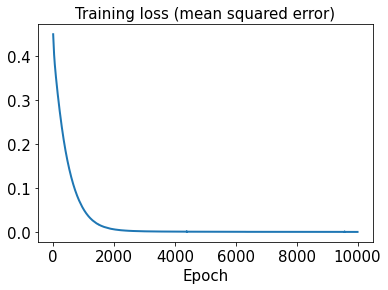

In [41]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

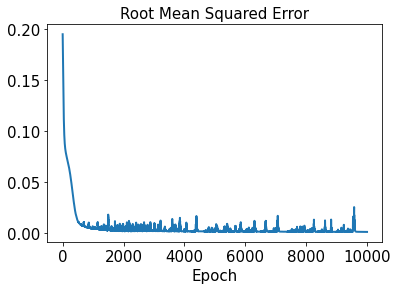

In [42]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [43]:
test_results = sd.evaluate(x_test)

1/1 [==============================] - 0s 120ms/step - loss: 2.1602e-04 - rmse: 0.0000e+00


In [44]:
decoded_train = sd.predict(x_train)

In [45]:
decoded_test = sd.predict(x_test)

In [46]:
error_train_abs = np.abs(decoded_train - y_train)

In [47]:
error_test_abs = np.abs(decoded_test - y_test)

In [48]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.032561954


In [49]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.46363994


In [50]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.013143661, 0.013608775, 0.0112719145, 0.148234, 0.01744876, 0.016355474, 0.014503616, 0.0073067187, 0.012103852, 0.018628946, 0.00990949, 0.013387981, 0.008337289, 0.014207373, 0.0147860395, 0.006799113, 0.041249815, 0.021780454, 0.019175647, 0.013071934, 0.011772311, 0.011436337, 0.010648647, 0.01923665, 0.013352569]


In [51]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.06956012, 0.09906088, 0.08582505, 1.0055112, 0.10200096, 0.40959308, 0.985554, 0.126335, 0.25764963, 0.08628182, 0.3313453]


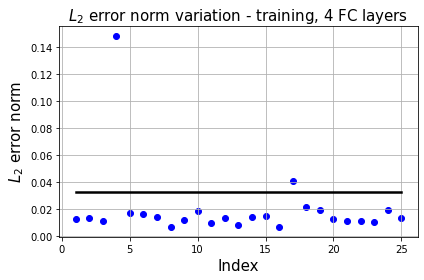

In [52]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - training, 4 FC layers', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

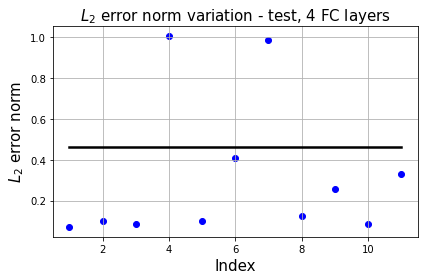

In [53]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - test, 4 FC layers', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

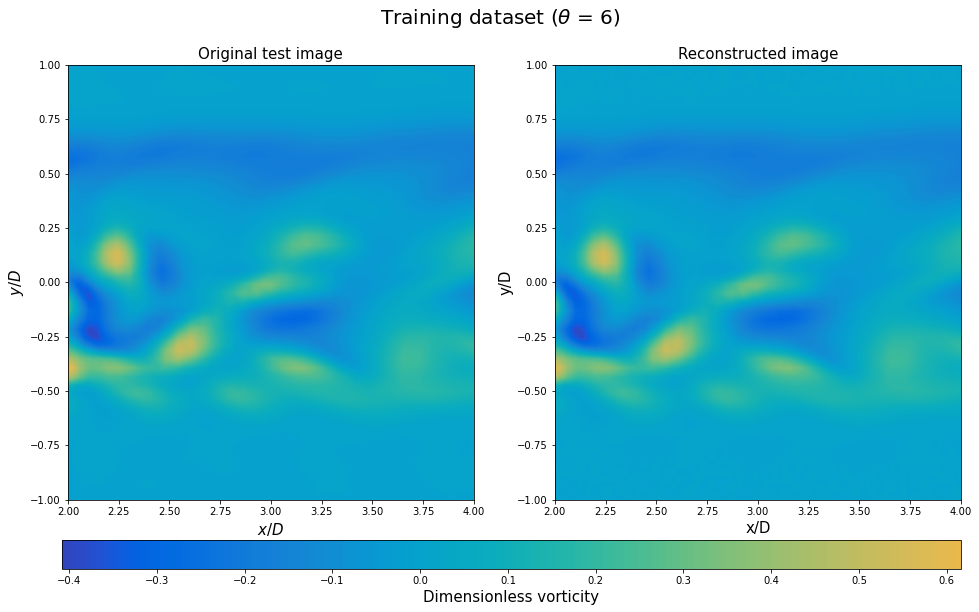

In [93]:
plt.figure(figsize=(16, 8))
y_train4_rotate = y_train[4].T.reshape(100, 100)
decoded_rotate = decoded_train[4].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 6)',fontsize=20)
plt.show()

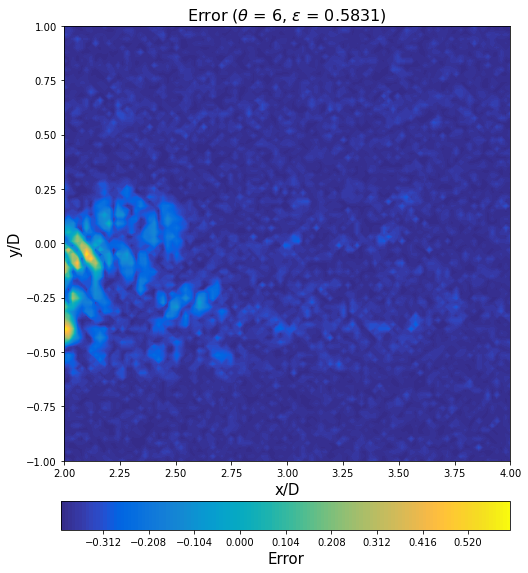

In [55]:
error_train_abs4_rotate = error_train_abs[4].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs4_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Error ($\theta$ = 6, $\epsilon$ = 0.5831)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

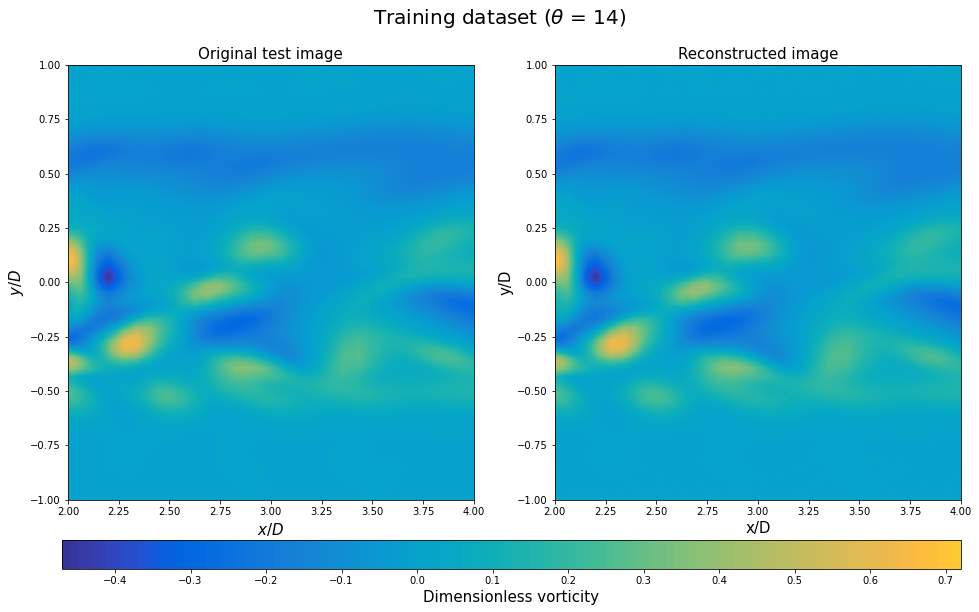

In [92]:
plt.figure(figsize=(16, 8))
y_train11_rotate = y_train[-5].T.reshape(100, 100)
decoded_rotate = decoded_train[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train11_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 14)', fontsize=20)
plt.show()

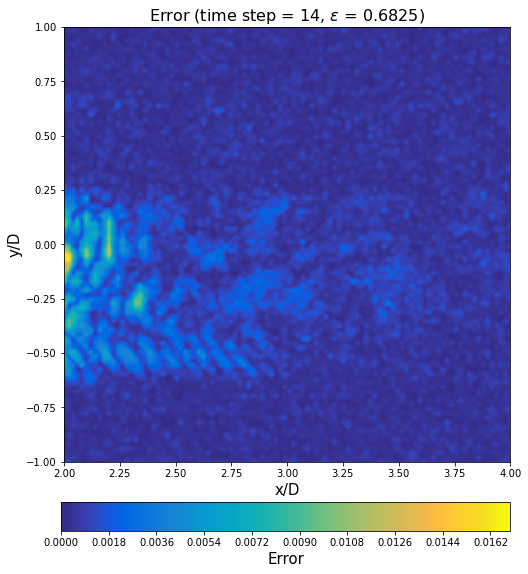

In [76]:
error_train_abs11_rotate = error_train_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs11_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 14, $\epsilon$ = 0.6825)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

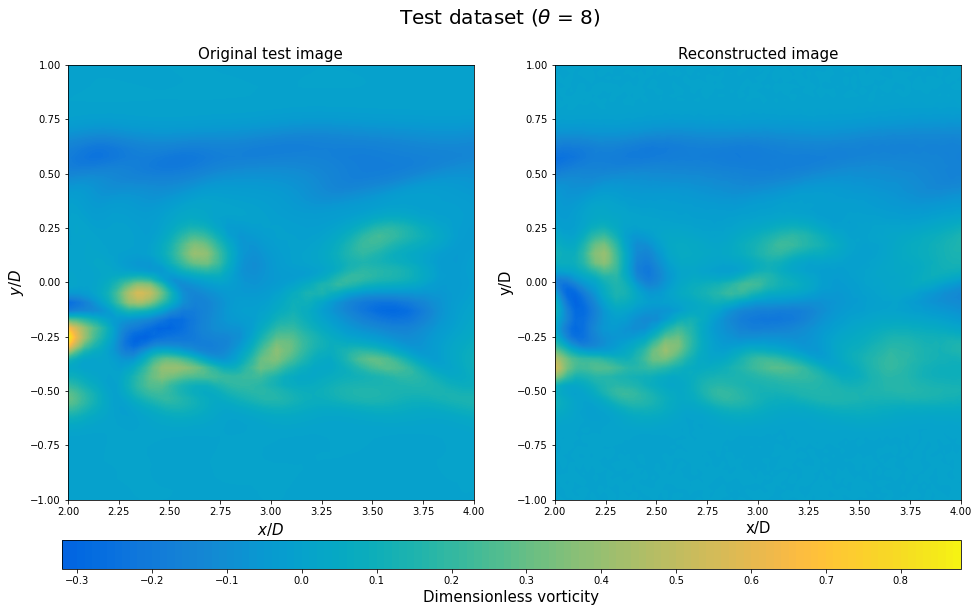

In [91]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 8)',fontsize=20)
plt.show()

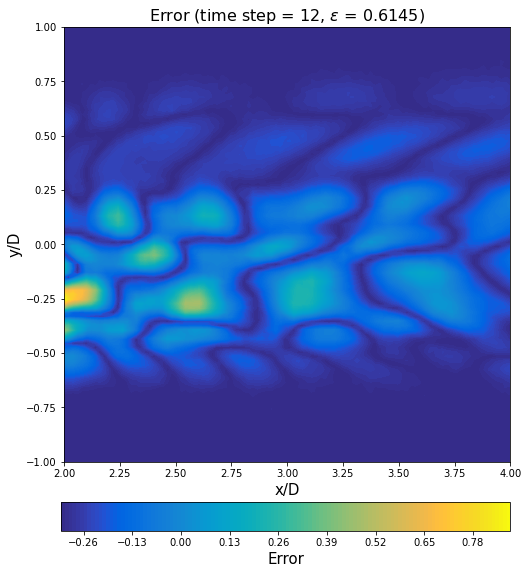

In [59]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 12, $\epsilon$ = 0.6145)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

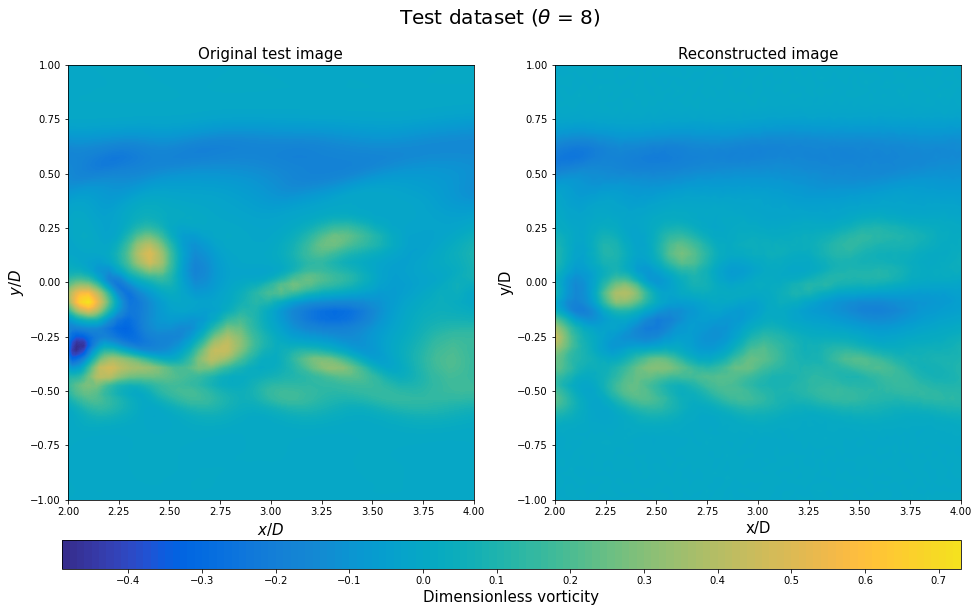

In [87]:
plt.figure(figsize=(16, 8))
y_test6_rotate = y_test[6].T.reshape(100, 100)
decoded_rotate = decoded_test[6].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test6_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

a1.set_clim(-0.5,0.8)
a2.set_clim(-0.5,0.8)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

plt.suptitle(r'Test dataset ($\theta$ = 8)',fontsize=20)
plt.show()

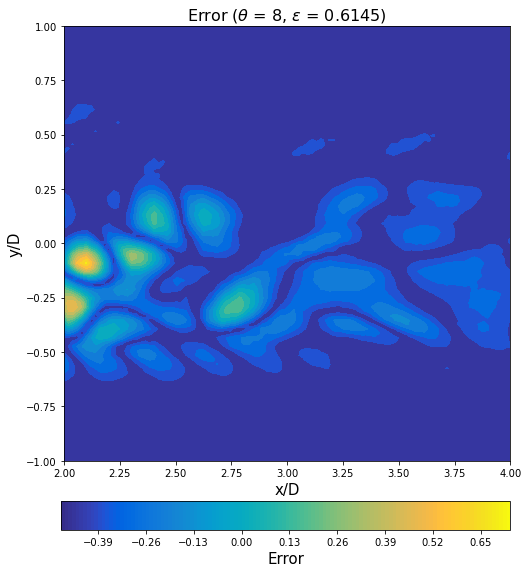

In [61]:
error_test_abs_rotate6 = error_test_abs[6].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate6, levels=16, cmap=parula_map)
ax5.set_title(r'Error ($\theta$ = 8, $\epsilon$ = 0.6145)', fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [62]:
vor_ytrain1_D200 = y_train[1].T[:, 0]
vor_ytrain1_D225 = y_train[1].T[:, 12]
vor_ytrain1_D250 = y_train[1].T[:, 24]
vor_ytrain2_D200 = y_train[2].T[:, 0]
vor_ytrain2_D225 = y_train[2].T[:, 12]
vor_ytrain2_D250 = y_train[2].T[:, 24]
vor_ytest1_D200 = y_test[1].T[:, 0]
vor_ytest1_D225 = y_test[1].T[:, 12]
vor_ytest1_D250 = y_test[1].T[:, 24]
vor_ytest2_D200 = y_test[2].T[:, 0]
vor_ytest2_D225 = y_test[2].T[:, 12]
vor_ytest2_D250 = y_test[2].T[:, 24]

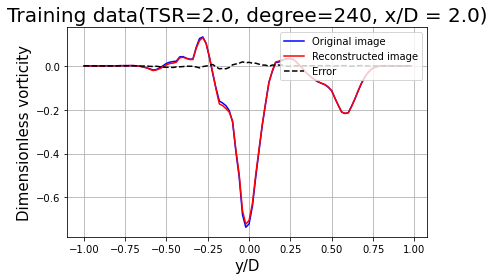

In [63]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[1].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D200.reshape(100,1)-decoded_train[1].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=240, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

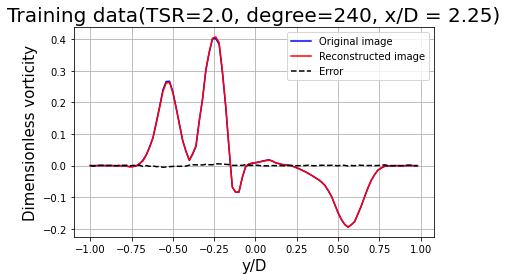

In [64]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[1].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D225.reshape(100,1)-decoded_train[1].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=240, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

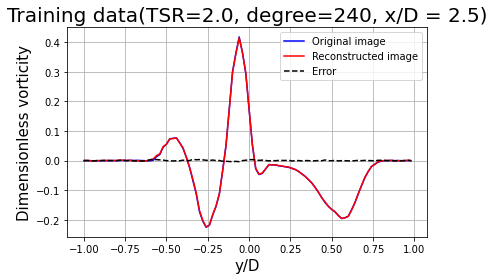

In [65]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[1].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain1_D250.reshape(100,1)-decoded_train[1].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=240, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

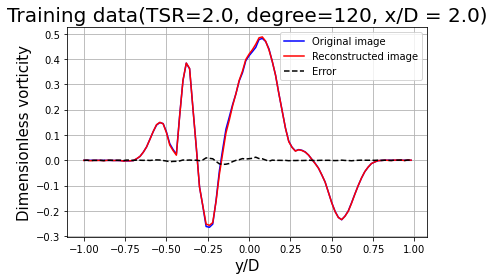

In [66]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[2].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D200.reshape(100,1)-decoded_train[2].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=120, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

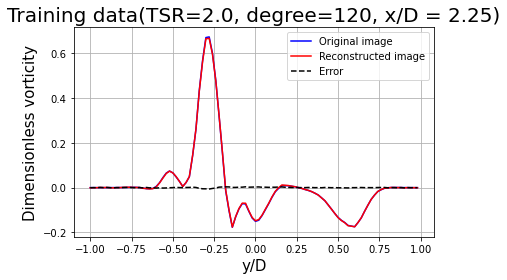

In [67]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[2].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D225.reshape(100,1)-decoded_train[2].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=120, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

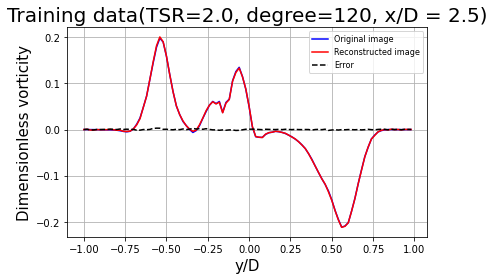

In [68]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[2].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytrain2_D250.reshape(100,1)-decoded_train[2].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Training data(TSR=2.0, degree=120, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

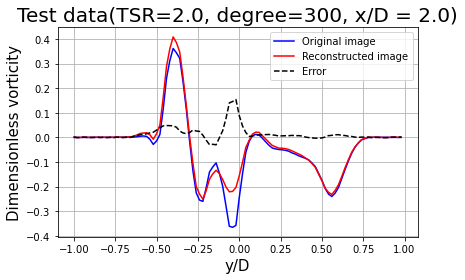

In [69]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D200.reshape(100,1)-decoded_test[1].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

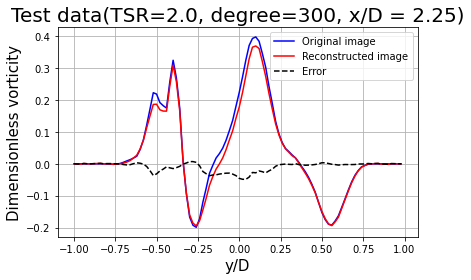

In [70]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D225.reshape(100,1)-decoded_test[1].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

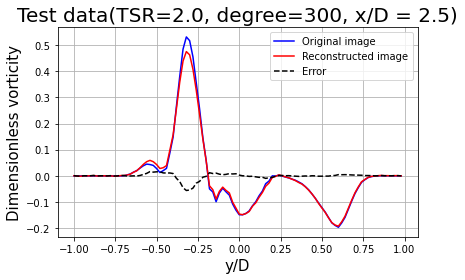

In [71]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[1].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest1_D250.reshape(100,1)-decoded_test[1].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

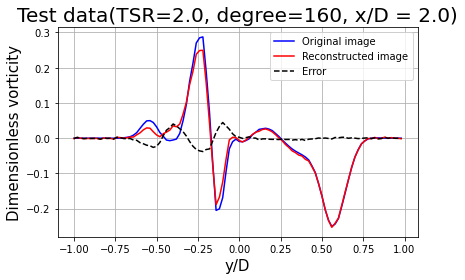

In [72]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D200.reshape(100,1)-decoded_test[2].T[:, 0].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=160, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

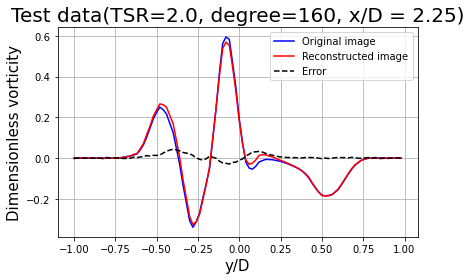

In [73]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D225.reshape(100,1)-decoded_test[2].T[:, 12].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=160, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

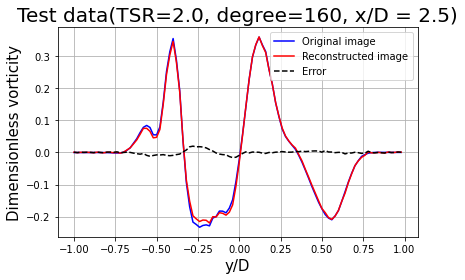

In [74]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[2].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), -(vor_ytest2_D250.reshape(100,1)-decoded_test[2].T[:, 24].reshape(100,1)), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title('Test data(TSR=2.0, degree=160, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()